# Preprocessing of the Microbiome Data with Analysis

## Python Modules and Libraries

In [62]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
merged_df = pd.read_table('/Users/naifganadily/Desktop/Artificial Intelligence for Precision Nutrition Bootcamp/gut-microbiome-precision-nutrition/data/results/merged.hmp.h1.truth.cleaned.txt', index_col=0)

In [3]:
# Add the columns to a list to be easily integrated
encoding_columns = ['Sex', 'Class', 'Race', 'IR_IS']
func_encoder = OneHotEncoder(sparse=False, drop='first')
encoded_columns = func_encoder.fit_transform(merged_df[encoding_columns])
encoded_columns = pd.DataFrame(encoded_columns, columns=func_encoder.get_feature_names_out(encoding_columns))

merged_df = merged_df.drop(columns=encoding_columns)
df_onehot = pd.concat([merged_df.reset_index(drop=True), encoded_columns.reset_index(drop=True)], axis=1)

display(df_onehot)

/Users/naifganadily/opt/anaconda3/envs/cv_humans/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Age    BMI    SSPG  phylum_Actinobacteria  phylum_Bacteroidetes  \
0   58.65  31.24  162.00               0.013645              0.582611   
1   49.69  28.24   75.00               0.002822              0.260515   
2   57.72  28.89  234.00               0.047996              0.134357   
3   50.02  26.94   40.00               0.005159              0.333832   
4   66.08  32.54   65.00               0.003147              0.353603   
5   61.95  30.59  174.00               0.000936              0.444029   
6   62.88  32.94  220.00               0.004373              0.695161   
7   64.56  26.69   99.00               0.003209              0.665174   
8   67.90  29.53   62.00               0.038886              0.159581   
9   50.90  26.86   70.00               0.001151              0.514665   
10  51.13  29.31  175.00               0.011758              0.651818   
11  60.71  34.15  235.00               0.016343              0.264312   
12  38.80  22.51   92.00               0.009740              0.256027   
13  54.74  27.33  130.00               0.003120              0.161809   
14  61.00  29.99  221.00               0.003967              0.558101   
15  60.18  26.00  160.00               0.003706              0.563410   
16  45.43  26.71  212.13               0.001617              0.509769   
17  54.16  31.28  117.00               0.004685              0.489099   
18  59.25  23.82   87.00               0.004121              0.426074   
19  66.81  33.32  148.00               0.012615              0.474929   
20  67.47  30.18  133.50               0.001278              0.680192   
21  60.18  32.21  140.00               0.023451              0.255514   
22  44.81  34.49  184.00               0.001513              0.601481   
23  59.48  21.47   91.50               0.005518              0.481819   
24  54.02  24.99   93.00               0.003676              0.391459   
25  52.33  24.44   57.00               0.005047              0.529579   
26  68.82  25.99  159.00               0.000445              0.362055   
27  54.39  32.29  104.00               0.000902              0.542390   
28  65.41  29.41   62.00               0.001867              0.483669   
29  52.94  23.31  222.00               0.007785              0.550382   
30  52.46  25.20  161.00               0.002488              0.553189   
31  53.68  38.90  223.00               0.006390              0.361850   
32  56.13  24.54  129.00               0.011910              0.526379   
33  61.94  29.47  224.60               0.003191              0.537843   
34  63.04  24.07  155.37               0.002676              0.553330   
35  48.32  27.91   76.00               0.003423              0.806917   
36  40.98  23.16   90.00               0.014823              0.427930   
37  45.43  33.30  162.00               0.000940              0.913461   
38  44.00  29.41  225.00               0.003962              0.200566   
39  54.37  33.46  220.00               0.027102              0.392654   
40  56.73  24.66  100.50               0.000035              0.718804   
41  58.19  27.59  220.00               0.004626              0.013236   
42  60.50  25.19   58.00               0.005306              0.169443   
43  57.04  28.68  250.00               0.000810              0.448811   
44  47.52  27.49  217.80               0.001905              0.543614   
45  50.98  25.72  110.88               0.019231              0.660372   
46  51.58  28.81  190.00               0.001224              0.591687   
47  44.41  24.01   67.13               0.000286              0.521887   
48  54.36  29.25   51.00               0.010238              0.115068   
49  55.86  28.63  178.75               0.000997              0.261701   
50  67.09  28.40  174.00               0.000154              0.589315   
51  62.92  30.79  257.50               0.000406              0.603685   
52  62.80  33.96  191.00               0.003672              0.562503   
53  63.26  31.41  274.00               0.000592              0.5

## Taxonomy

In [60]:
df = df_onehot

In [61]:
df.head()

Age    BMI   SSPG  phylum_Actinobacteria  phylum_Bacteroidetes  \
0  58.65  31.24  162.0               0.013645              0.582611   
1  49.69  28.24   75.0               0.002822              0.260515   
2  57.72  28.89  234.0               0.047996              0.134357   
3  50.02  26.94   40.0               0.005159              0.333832   
4  66.08  32.54   65.0               0.003147              0.353603   

   phylum_Firmicutes  phylum_Proteobacteria  phylum_Verrucomicrobia  \
0           0.298357               0.104188                0.000128   
1           0.663827               0.008572                0.000106   
2           0.419235               0.353085                0.003414   
3           0.531276               0.019473                0.021875   
4           0.516195               0.016042                0.001253   

   phylum_unclassified_Bacteria  class_Actinobacteria  class_Bacilli  \
0                      0.000663              0.013645       0.000969   
1                      0.063997              0.002822       0.000000   
2                      0.041643              0.047996       0.001809   
3                      0.088247              0.005159       0.005749   
4                      0.108690              0.003147       0.001864   

   class_Bacteroidia  class_Betaproteobacteria  class_Clostridia  \
0           0.582611                  0.044149          0.270736   
1           0.260515                  0.008359          0.651954   
2           0.134221                  0.000769          0.368661   
3           0.331883                  0.011144          0.486050   
4           0.348897                  0.008923          0.490711   

   class_Deltaproteobacteria  class_Erysipelotrichia  \
0                   0.013518                0.010253   
1                   0.000160                0.006868   
2                   0.000339                0.014017   
3                   0.001595                0.019827   
4                   0.001681                0.011612   

   class_Gammaproteobacteria  class_Negativicutes  class_Verrucomicrobiae  \
0                   0.000765             0.016374                0.000128   
1                   0.000053             0.002289                0.000106   
2                   0.351977             0.016639                0.003414   
3                   0.000610             0.003721                0.021875   
4                   0.001100             0.005836                0.001253   

   class_unclassified_Bacteria  class_unclassified_Firmicutes  \
0                     0.000663                       0.000025   
1                     0.063997                       0.002715   
2                     0.041643                       0.018109   
3                     0.088247                       0.015929   
4                     0.108690                       0.006172   

   order_Bacteroidales  order_Burkholderiales  order_Clostridiales  \
0             0.582611               0.044149             0.270736   
1             0.260515               0.008306             0.651901   
2             0.134221               0.000769             0.367938   
3             0.331883               0.011144             0.484888   
4             0.348897               0.008923             0.489977   

   order_Coriobacteriales  order_Desulfovibrionales  order_Enterobacteriales  \
0                0.012829                  0.013518                 0.000765   
1                0.002715                  0.000160                 0.000053   
2                0.045441                  0.000339                 0.351977   
3                0.004785                  0.001595                 0.000000   
4                0.002933                  0.001681                 0.000031   

   order_Erysipelotrichales  order_Lactobacillales  order_Selenomonadales  \
0                  0.010253               0.000408               0.016374   
1                  0.006868               0.000000            

In [42]:
# split the taxonomy data 
# df_phylum 
phylum_columns = df.filter(like='phylum').columns
df_phylum = df[phylum_columns]

In [49]:
display(phylum_columns)

Index(['phylum_Actinobacteria', 'phylum_Bacteroidetes', 'phylum_Firmicutes',
       'phylum_Proteobacteria', 'phylum_Verrucomicrobia',
       'phylum_unclassified_Bacteria'],
      dtype='object')

In [52]:
# 0 for IR and 1 for IS
# Mean relative abundance for each group (IR and IS)
phylum_columns = df.filter(like='phylum').columns
df_mean = df.groupby('IR_IS_IS')[phylum_columns].mean()
df_mean = df_mean.T
df_mean = df_mean.loc[df_mean.sum(axis=1).sort_values(ascending=False).index]
df_mean.columns = ['Insulin Resistant', 'Insulin Sensitive']


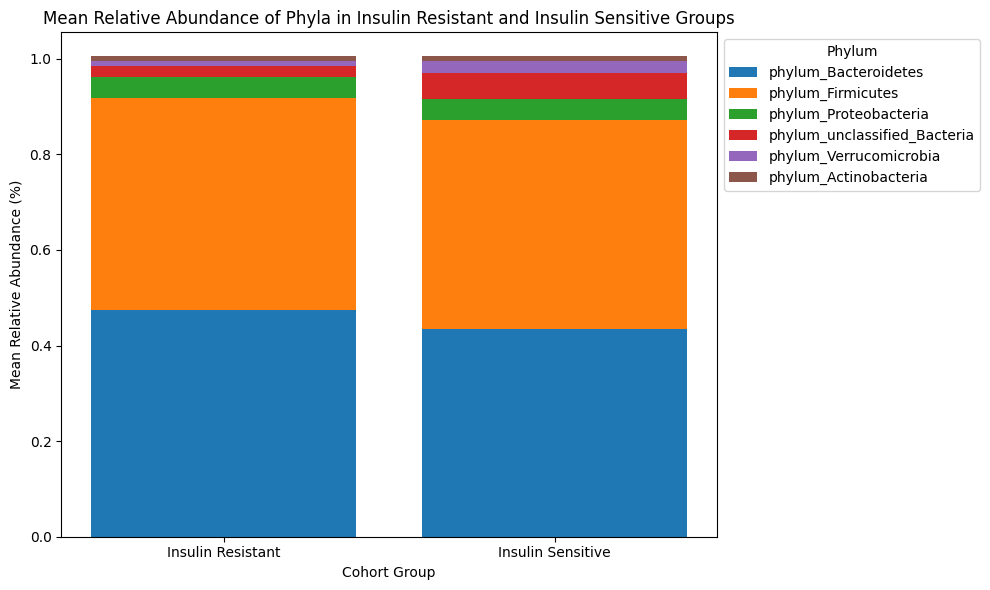

In [54]:
# pseudo-count to handle zeros
pseudo_count = 0.001
df_mean += pseudo_count

df_mean = df_mean.loc[df_mean.sum(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(10, 6))
bottom = np.zeros(df_mean.shape[1])
for taxon, datum in df_mean.iterrows():
    plt.bar(df_mean.columns, datum.values, bottom=bottom, label=taxon)
    bottom += datum

plt.legend(title='Phylum', bbox_to_anchor=(1, 1), loc='upper left')
plt.ylabel('Mean Relative Abundance (%)')
plt.xlabel('Cohort Group')
plt.title('Mean Relative Abundance of Phyla in Insulin Resistant and Insulin Sensitive Groups')
plt.tight_layout()
plt.show()


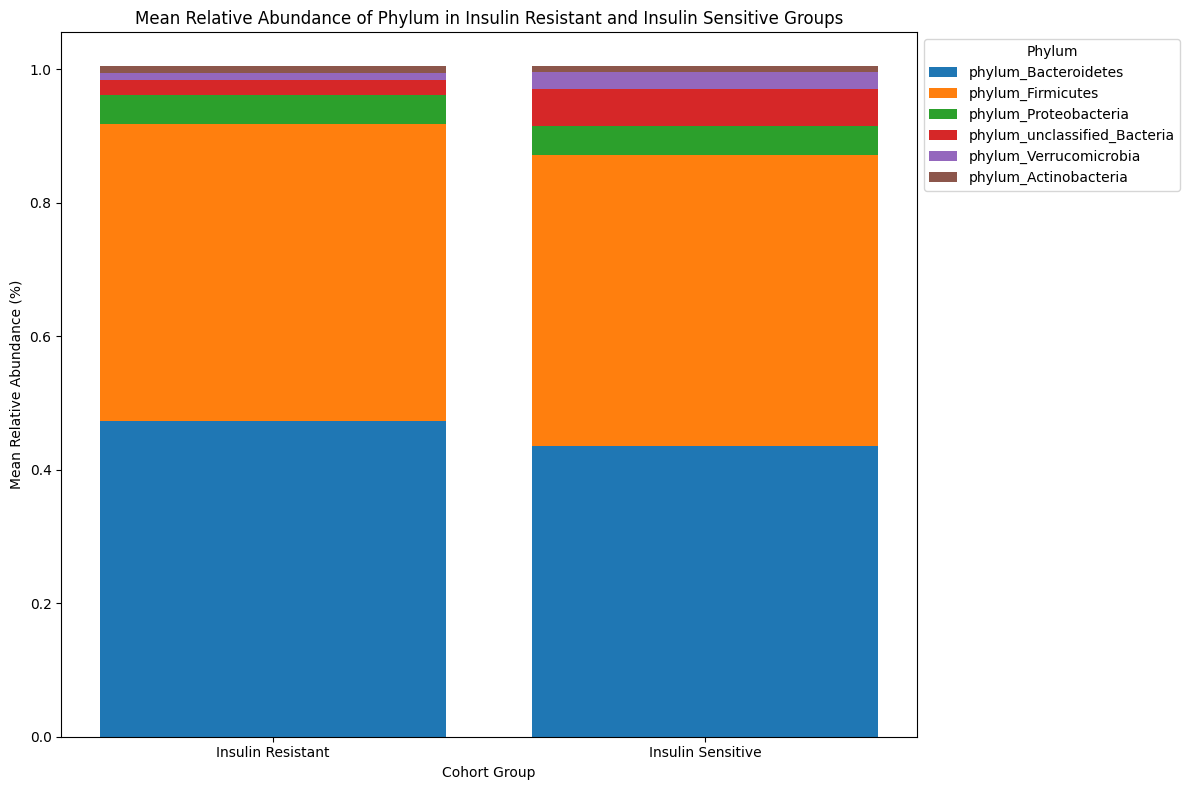

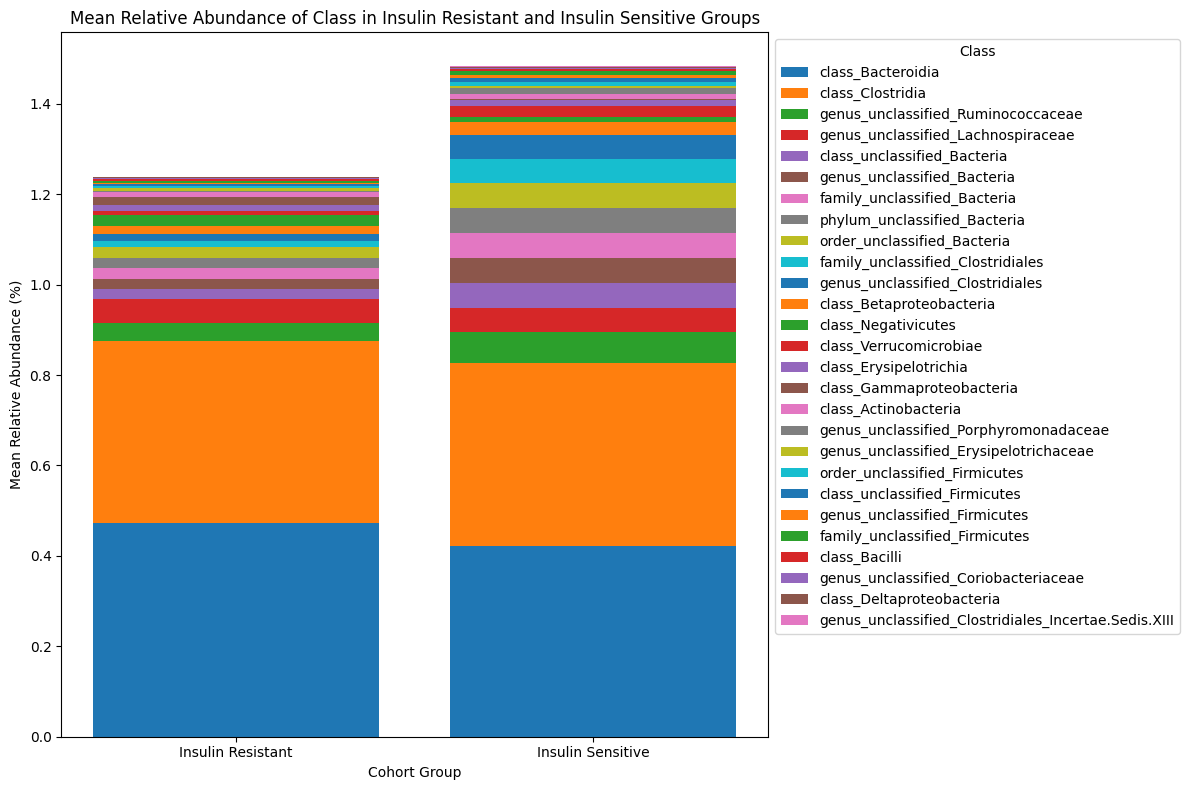

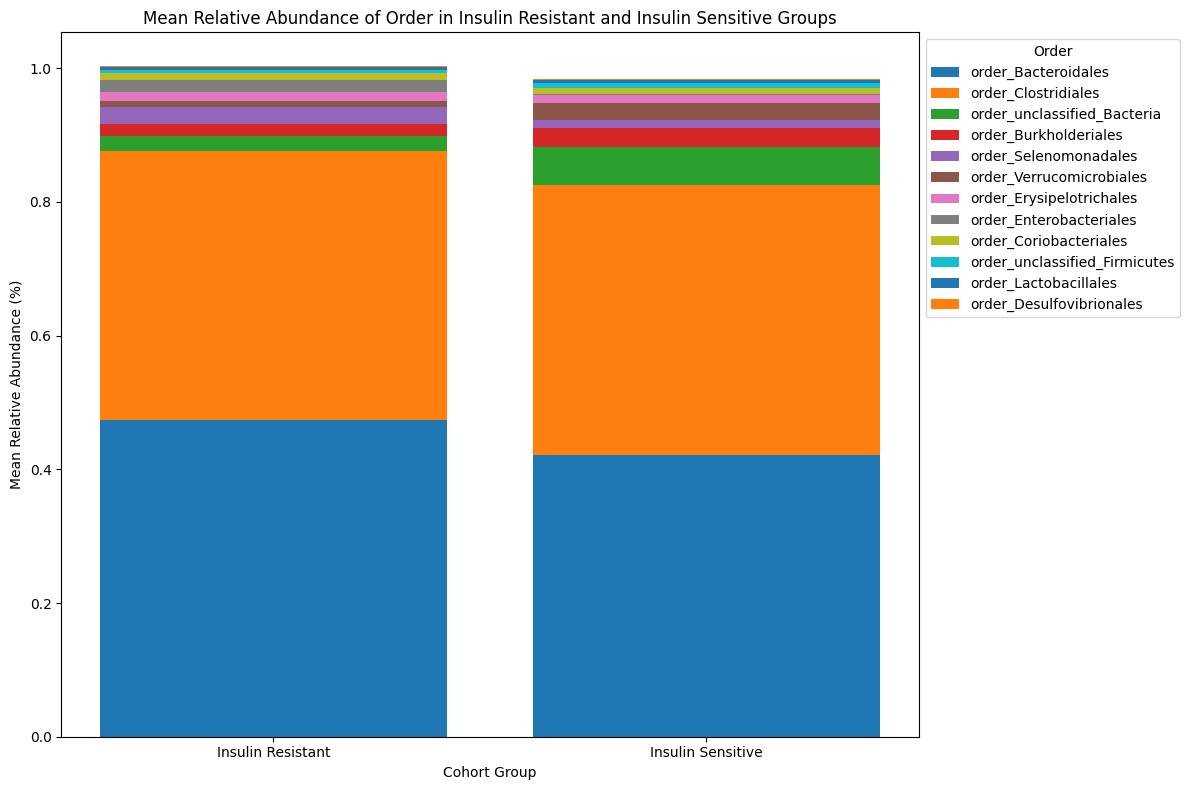

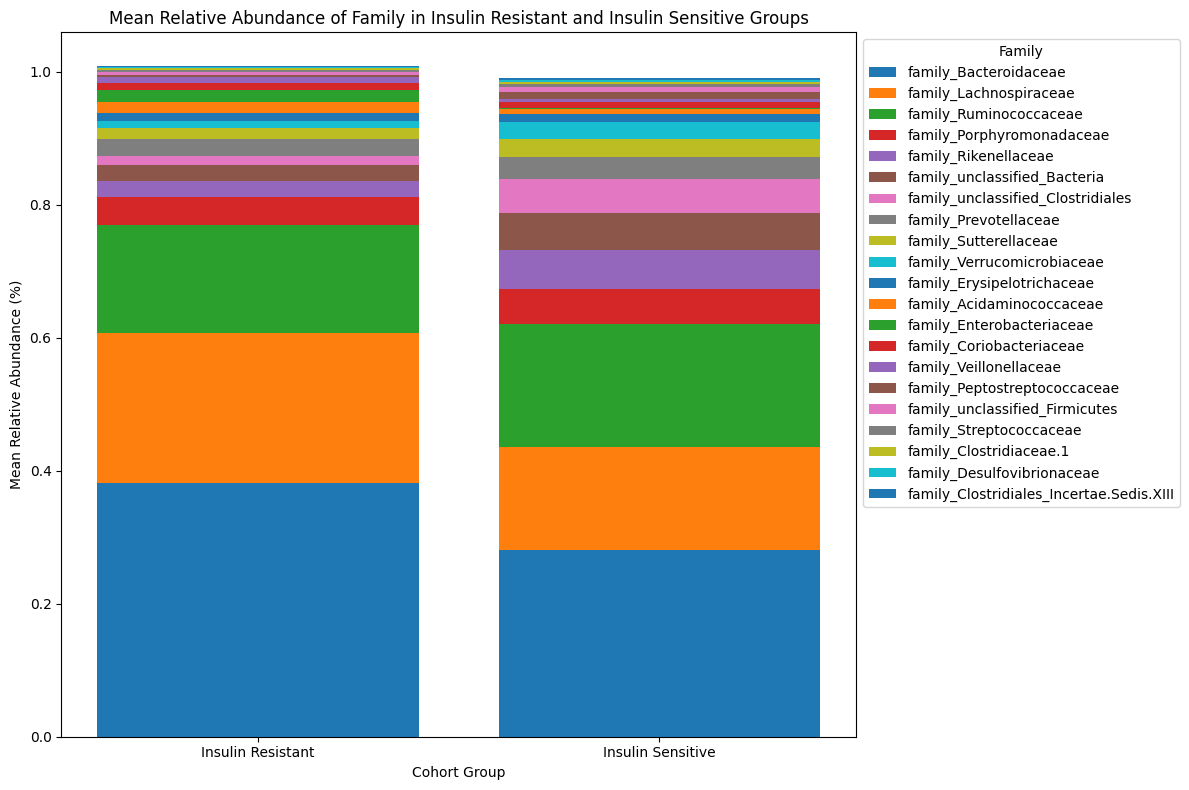

In [59]:
# List of taxonomic levels based on the dataset, excluding 'genus' due to visualization issues
taxonomic_levels = ['phylum', 'class', 'order', 'family']
# Loop each taxonomic level
for level in taxonomic_levels:
    columns = df.filter(like=level).columns
    df_taxonomy = df[columns]
    
    df_mean = df.groupby('IR_IS_IS')[columns].mean()

    pseudo_count = 0.001
    df_mean += pseudo_count
    df_mean = df_mean.T

    df_mean = df_mean.loc[df_mean.sum(axis=1).sort_values(ascending=False).index]
    df_mean.columns = ['Insulin Resistant', 'Insulin Sensitive']

    plt.figure(figsize=(12, 8))
    bottom = np.zeros(df_mean.shape[1])
    for taxon, datum in df_mean.iterrows():
        plt.bar(df_mean.columns, datum.values, bottom=bottom, label=taxon)
        bottom += datum

    plt.legend(title=level.capitalize(), bbox_to_anchor=(1, 1), loc='upper left')
    plt.ylabel('Mean Relative Abundance (%)')
    plt.xlabel('Cohort Group')
    plt.title(f'Mean Relative Abundance of {level.capitalize()} in Insulin Resistant and Insulin Sensitive Groups')
    plt.tight_layout()
    plt.show()

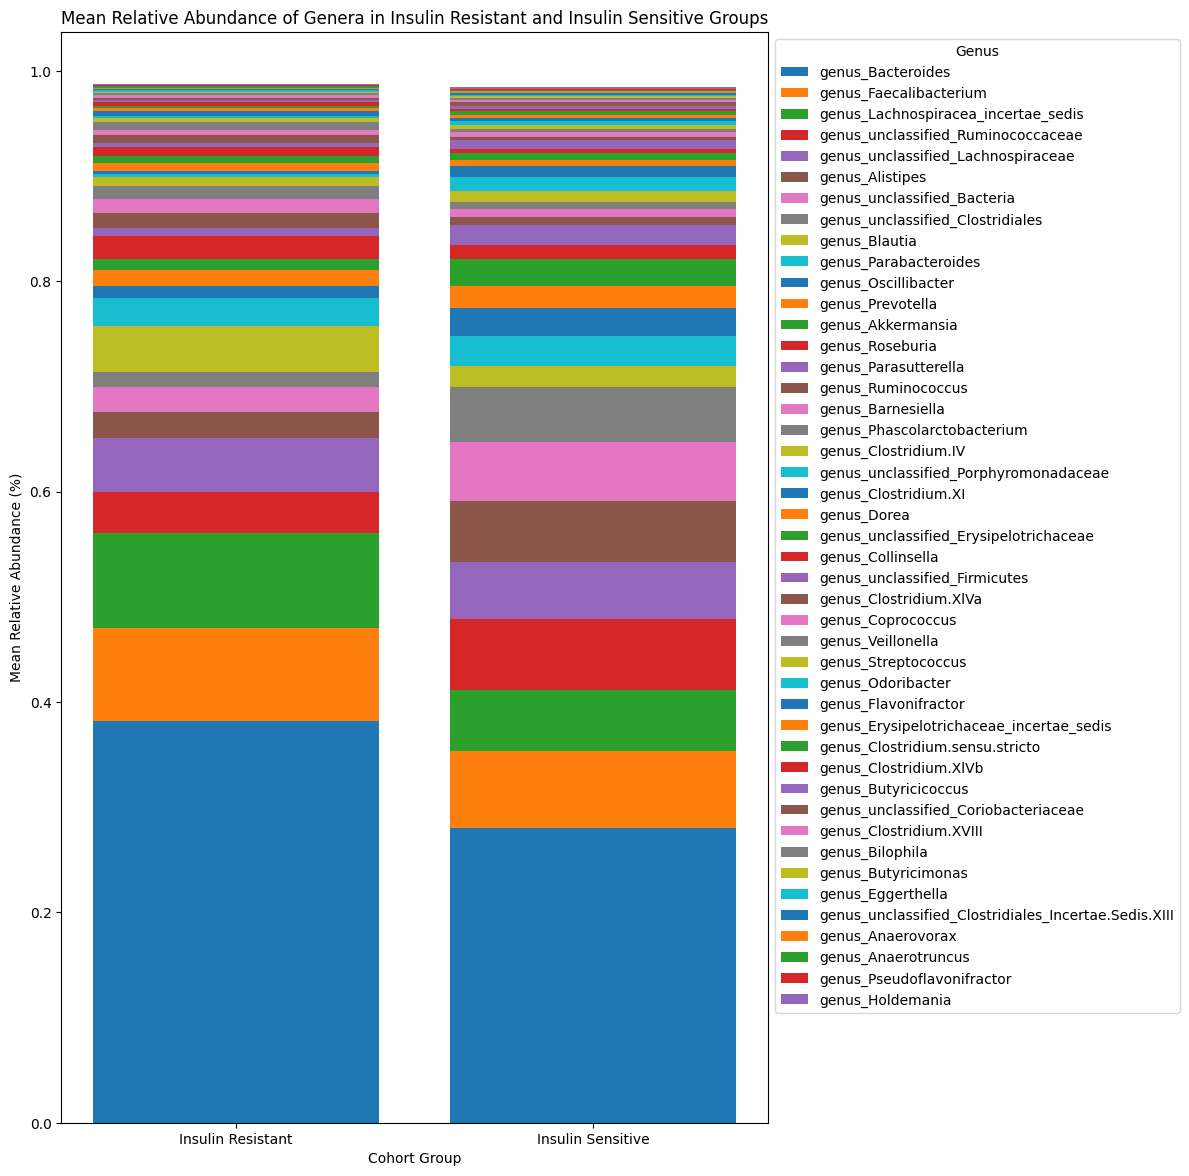

In [58]:
genus_columns = df.filter(like='genus').columns
df_genus = df[genus_columns]

df_mean_genus = df.groupby('IR_IS_IS')[genus_columns].mean()

pseudo_count = 0.001
df_mean_genus += pseudo_count
df_mean_genus = df_mean_genus.T


df_mean_genus = df_mean_genus.loc[df_mean_genus.sum(axis=1).sort_values(ascending=False).index]
df_mean_genus.columns = ['Insulin Resistant', 'Insulin Sensitive']


plt.figure(figsize=(12, 12)) # Increase the figure size to accommodate the large number of genera
bottom = np.zeros(df_mean_genus.shape[1])
for taxon, datum in df_mean_genus.iterrows():
    plt.bar(df_mean_genus.columns, datum.values, bottom=bottom, label=taxon)
    bottom += datum

plt.legend(title='Genus', bbox_to_anchor=(1, 1), loc='upper left')
plt.ylabel('Mean Relative Abundance (%)')
plt.xlabel('Cohort Group')
plt.title('Mean Relative Abundance of Genera in Insulin Resistant and Insulin Sensitive Groups')
plt.tight_layout()
plt.show()

## Statistical Relevace between Features

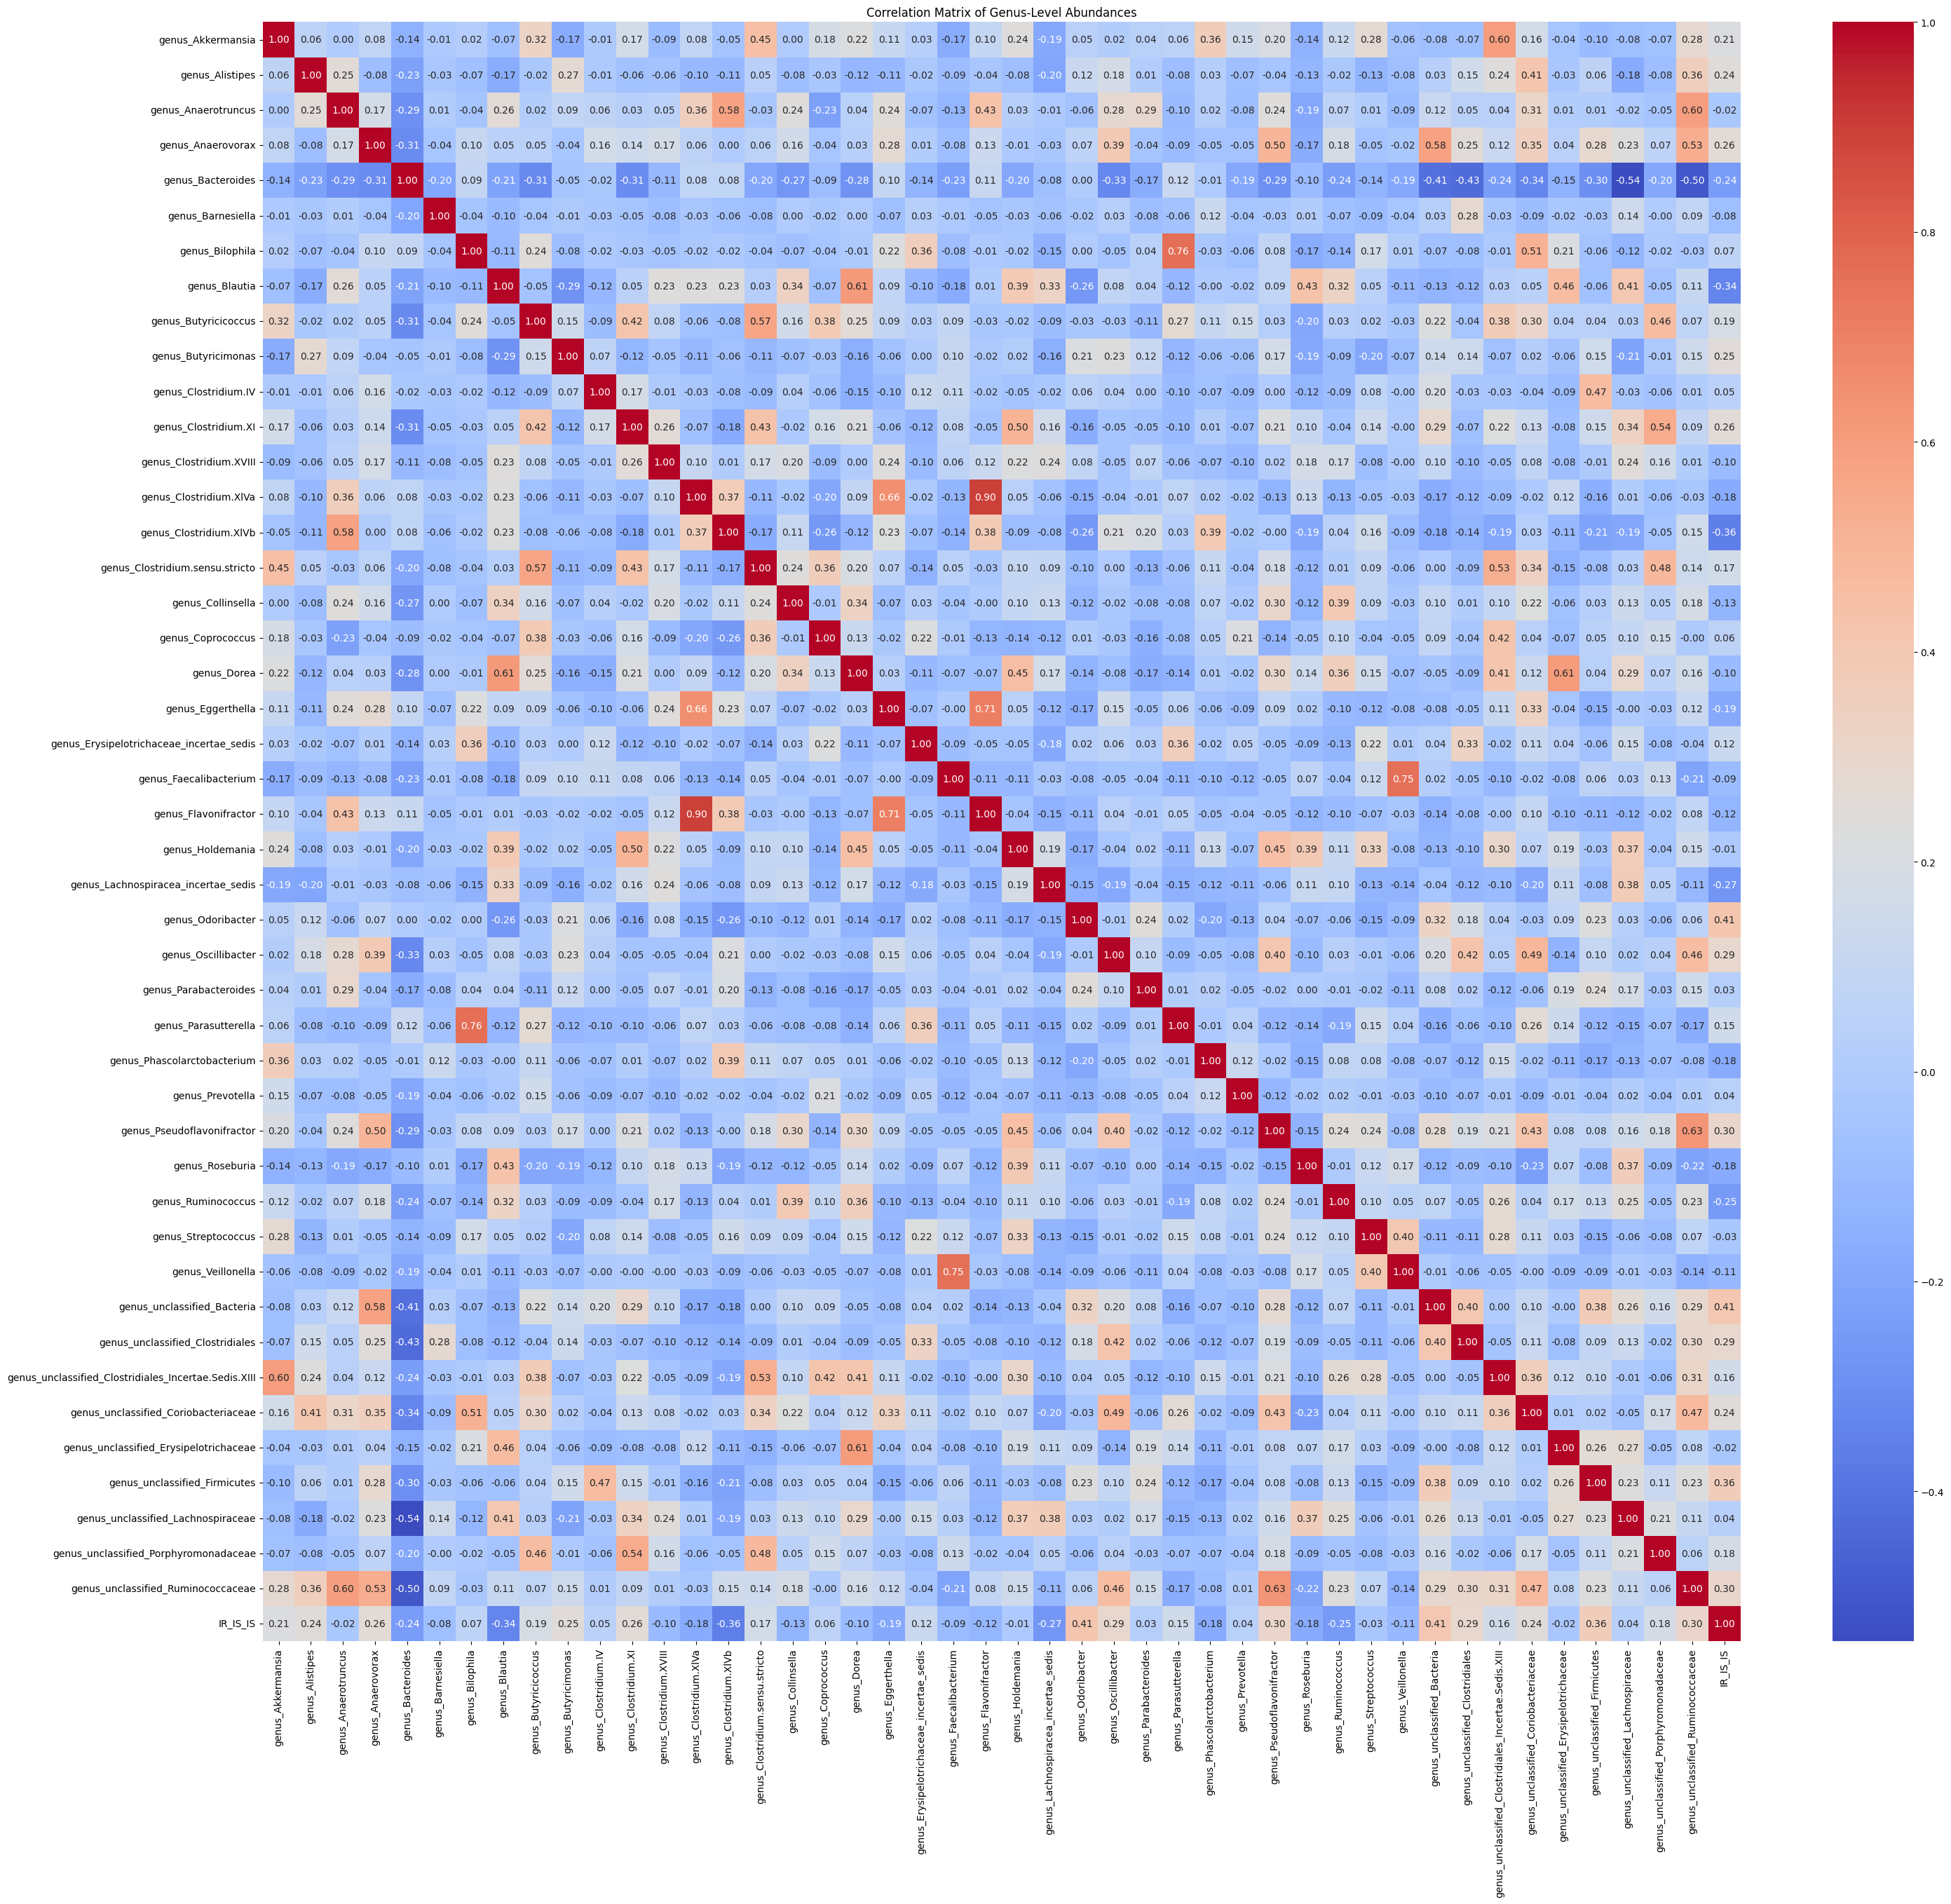

In [68]:
df_genus_target = df_genus.copy()
df_genus_target['IR_IS_IS'] = df['IR_IS_IS']

correlation_matrix = df_genus_target.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(34, 30))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Genus-Level Abundances')
plt.show()

In [69]:
ir_group = df_genus_target[df_genus_target['IR_IS_IS'] == 0]
is_group = df_genus_target[df_genus_target['IR_IS_IS'] == 1]

# Perform a Mann-Whitney U test for each genus to check for significant differences
p_values = {}
for genus in genus_columns:
    stat, p_value = stats.mannwhitneyu(ir_group[genus], is_group[genus])
    p_values[genus] = p_value

# Convert p-values to a DataFrame for easier interpretation
p_values_df = pd.DataFrame.from_dict(p_values, orient='index', columns=['p_value'])
p_values_df['significant'] = p_values_df['p_value'] < 0.05
significant_genera = p_values_df[p_values_df['significant']]
significant_genera_sorted = significant_genera.sort_values(by='p_value')

print(significant_genera_sorted)

                                       p_value  significant
genus_Odoribacter                     0.000481         True
genus_unclassified_Clostridiales      0.001594         True
genus_unclassified_Firmicutes         0.002284         True
genus_Clostridium.XlVb                0.002285         True
genus_unclassified_Bacteria           0.003239         True
genus_Blautia                         0.006612         True
genus_Pseudoflavonifractor            0.006927         True
genus_unclassified_Ruminococcaceae    0.007582         True
genus_Oscillibacter                   0.013422         True
genus_Barnesiella                     0.016290         True
genus_Alistipes                       0.035099         True
genus_unclassified_Coriobacteriaceae  0.041988         True
genus_Butyricimonas                   0.043329         True
genus_Clostridium.XI                  0.048529         True


In [71]:
!pip install scikit-bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 3.2 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 6.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 8.4 MB/s eta 0:00:0000:0100:01
  Using cached click-8.1.7-py3-none-any.whl (97 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 7.4 MB/s eta 0:00:00
  Created wheel for scikit-bio: filename=scikit_bio-0.6.2-cp39-cp39-macosx_10_9_x86_64.whl size=2381955 sha256=44e92ac7644a718ee4171c1906fa41faae2ca10b6246e34f77a3641cbacde827
  Stored in directory: /Users/naifganadily/Library/Caches/pip/wheels/77/aa/10/57e5692dc539802da5df5fa39b3b217e7f4d77feccb12f37b9
  Created wheel for biom

In [74]:
from skbio.stats.composition import ancom
# pseudo-count
pseudo_count = 0.001
ancom_df = df_genus_target.copy()
ancom_df.iloc[:, :-1] += pseudo_count

# ANCOM analysis using the Kruskal-Wallis test 
ancom_results = ancom(ancom_df.iloc[:, :-1], ancom_df['IR_IS_IS'], significance_test='kruskal')
print(ancom_results)

(                                                     W  Reject null hypothesis
genus_Akkermansia                                    0                    True
genus_Alistipes                                      0                    True
genus_Anaerotruncus                                  1                    True
genus_Anaerovorax                                    1                    True
genus_Bacteroides                                    1                    True
genus_Barnesiella                                    0                    True
genus_Bilophila                                      0                    True
genus_Blautia                                       10                    True
genus_Butyricicoccus                                 0                    True
genus_Butyricimonas                                  1                    True
genus_Clostridium.IV                                 0                    True
genus_Clostridium.XI                               

## Just Microbiome Data Analysis

In [4]:
# Just Microbiome Data

microbiome_df = df_onehot.drop(columns=['SSPG', 'Age', 'BMI', 'Sex_M',	'Class_Crossover', 'Class_Diabetic'	,'Class_Prediabetic', 'Race_B', 'Race_C',	'Race_H'])
display(microbiome_df)

phylum_Actinobacteria  phylum_Bacteroidetes  phylum_Firmicutes  \
0                0.013645              0.582611           0.298357   
1                0.002822              0.260515           0.663827   
2                0.047996              0.134357           0.419235   
3                0.005159              0.333832           0.531276   
4                0.003147              0.353603           0.516195   
5                0.000936              0.444029           0.493188   
6                0.004373              0.695161           0.241594   
7                0.003209              0.665174           0.205120   
8                0.038886              0.159581           0.670457   
9                0.001151              0.514665           0.440856   
10               0.011758              0.651818           0.303515   
11               0.016343              0.264312           0.696024   
12               0.009740              0.256027           0.566829   
13               0.003120              0.161809           0.635630   
14               0.003967              0.558101           0.355582   
15               0.003706              0.563410           0.340153   
16               0.001617              0.509769           0.424726   
17               0.004685              0.489099           0.333772   
18               0.004121              0.426074           0.335125   
19               0.012615              0.474929           0.188489   
20               0.001278              0.680192           0.305329   
21               0.023451              0.255514           0.521745   
22               0.001513              0.601481           0.252296   
23               0.005518              0.481819           0.324148   
24               0.003676              0.391459           0.534781   
25               0.005047              0.529579           0.359154   
26               0.000445              0.362055           0.616855   
27               0.000902              0.542390           0.247407   
28               0.001867              0.483669           0.458878   
29               0.007785              0.550382           0.375992   
30               0.002488              0.553189           0.413628   
31               0.006390              0.361850           0.601144   
32               0.011910              0.526379           0.404485   
33               0.003191              0.537843           0.383698   
34               0.002676              0.553330           0.424866   
35               0.003423              0.806917           0.173778   
36               0.014823              0.427930           0.477526   
37               0.000940              0.913461           0.066023   
38               0.003962              0.200566           0.785409   
39               0.027102              0.392654           0.399940   
40               0.000035              0.718804           0.247895   
41               0.004626              0.013236           0.939088   
42               0.005306              0.169443           0.686502   
43               0.000810              0.448811           0.336305   
44               0.001905              0.543614           0.361450   
45               0.019231              0.660372           0.285730   
46               0.001224              0.591687           0.376567   
47               0.000286              0.521887           0.278465   
48               0.010238              0.115068           0.775506   
49               0.000997              0.261701           0.658075   
50               0.000154              0.589315           0.401047   
51               0.000406              0.603685           0.316682   
52               0.003672              0.562503           0.418753   
53               0.000592              0.514622           0.368003   
54               0.005785              0.366276           0.608105   
55               0.024745              0.325858           0.585060   
56            

In [5]:
# Save Microbiome Dataset
microbiome_df.to_csv('/Users/naifganadily/Desktop/Artificial Intelligence for Precision Nutrition Bootcamp/gut-microbiome-precision-nutrition/data/results/microbiome_df.csv')

In [6]:
microbiome_df['IR_IS_IS'].value_counts()

IR_IS_IS
0.0    32
1.0    27
Name: count, dtype: int64

### Data distribution
"Many cell values are zeros. This indicates that either the microbe is not present in the sample, or it is there but not detected because its concentration is so low that our sequencing / mapping methods were not sensitive enough. We don't know which one. This "zero inflation" property is the tricky part of microbiome data science, but it is beyond the scope of the current study." - Prof. Qiyun

In [7]:
df_without_target = microbiome_df.iloc[:, :-1]
print("Ratio of Non-Zero Values: ", df_without_target.astype(bool).sum().sum() / df_without_target.size)
print("Ratio of Zero Values: ", 1 - df_without_target.astype(bool).sum().sum() / df_without_target.size)

Ratio of Non-Zero Values:  0.8836511299435028
Ratio of Zero Values:  0.11634887005649719


In [8]:
sample = df_without_target.iloc[:, 0]
sample

0     0.013645
1     0.002822
2     0.047996
3     0.005159
4     0.003147
5     0.000936
6     0.004373
7     0.003209
8     0.038886
9     0.001151
10    0.011758
11    0.016343
12    0.009740
13    0.003120
14    0.003967
15    0.003706
16    0.001617
17    0.004685
18    0.004121
19    0.012615
20    0.001278
21    0.023451
22    0.001513
23    0.005518
24    0.003676
25    0.005047
26    0.000445
27    0.000902
28    0.001867
29    0.007785
30    0.002488
31    0.006390
32    0.011910
33    0.003191
34    0.002676
35    0.003423
36    0.014823
37    0.000940
38    0.003962
39    0.027102
40    0.000035
41    0.004626
42    0.005306
43    0.000810
44    0.001905
45    0.019231
46    0.001224
47    0.000286
48    0.010238
49    0.000997
50    0.000154
51    0.000406
52    0.003672
53    0.000592
54    0.005785
55    0.024745
56    0.003025
57    0.117135
58    0.000076
Name: phylum_Actinobacteria, dtype: float64

In [9]:
s = sample.values
s = s[s > 0]
s.shape[0]

59

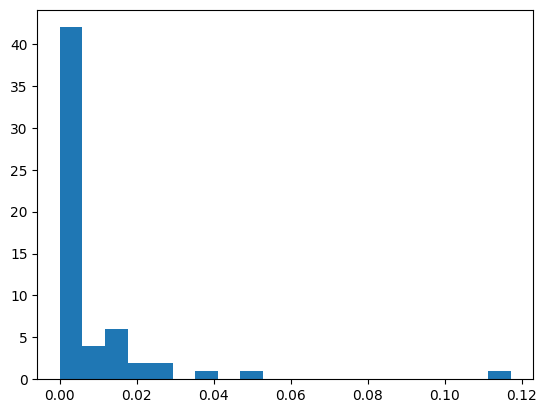

In [10]:
plt.hist(s, bins=20);

"This means that a microbial community is usually dominated by a few abundance organisms, whereas most other organisms are insignificant in the composition (but this doesn't mean that their functional roles are insignificant)." - Prof. Qiyun

After effective normalization, data from different samples can then be compared to each other. Ordination analysis, such as principal coordinate analysis (PCoA) [2], is often then applied to these normalized data to visualize broad trends of how similar or different bacterial populations are in certain sample types, such as healthy vs. sick patients (ordination is a general term for a family of techniques that summarize and project multivariate community data into lower-dimension space). This enables easy visual inspection of sample groupings, driven by sample bacterial content similarity/dissimilarity, and any association with sample metadata.[1]

[1] Weiss, S., Xu, Z.Z., Peddada, S. et al. Normalization and microbial differential abundance strategies depend upon data characteristics. Microbiome 5, 27 (2017). https://doi.org/10.1186/s40168-017-0237-y

[2] Gower JC. Some distance properties of latent root and vector methods used in multivariate analysis. Biometrika. 1966;53:325. doi:10.2307/2333639.

In [18]:
display(microbiome_df)

phylum_Actinobacteria  phylum_Bacteroidetes  phylum_Firmicutes  \
0                0.013645              0.582611           0.298357   
1                0.002822              0.260515           0.663827   
2                0.047996              0.134357           0.419235   
3                0.005159              0.333832           0.531276   
4                0.003147              0.353603           0.516195   
5                0.000936              0.444029           0.493188   
6                0.004373              0.695161           0.241594   
7                0.003209              0.665174           0.205120   
8                0.038886              0.159581           0.670457   
9                0.001151              0.514665           0.440856   
10               0.011758              0.651818           0.303515   
11               0.016343              0.264312           0.696024   
12               0.009740              0.256027           0.566829   
13               0.003120              0.161809           0.635630   
14               0.003967              0.558101           0.355582   
15               0.003706              0.563410           0.340153   
16               0.001617              0.509769           0.424726   
17               0.004685              0.489099           0.333772   
18               0.004121              0.426074           0.335125   
19               0.012615              0.474929           0.188489   
20               0.001278              0.680192           0.305329   
21               0.023451              0.255514           0.521745   
22               0.001513              0.601481           0.252296   
23               0.005518              0.481819           0.324148   
24               0.003676              0.391459           0.534781   
25               0.005047              0.529579           0.359154   
26               0.000445              0.362055           0.616855   
27               0.000902              0.542390           0.247407   
28               0.001867              0.483669           0.458878   
29               0.007785              0.550382           0.375992   
30               0.002488              0.553189           0.413628   
31               0.006390              0.361850           0.601144   
32               0.011910              0.526379           0.404485   
33               0.003191              0.537843           0.383698   
34               0.002676              0.553330           0.424866   
35               0.003423              0.806917           0.173778   
36               0.014823              0.427930           0.477526   
37               0.000940              0.913461           0.066023   
38               0.003962              0.200566           0.785409   
39               0.027102              0.392654           0.399940   
40               0.000035              0.718804           0.247895   
41               0.004626              0.013236           0.939088   
42               0.005306              0.169443           0.686502   
43               0.000810              0.448811           0.336305   
44               0.001905              0.543614           0.361450   
45               0.019231              0.660372           0.285730   
46               0.001224              0.591687           0.376567   
47               0.000286              0.521887           0.278465   
48               0.010238              0.115068           0.775506   
49               0.000997              0.261701           0.658075   
50               0.000154              0.589315           0.401047   
51               0.000406              0.603685           0.316682   
52               0.003672              0.562503           0.418753   
53               0.000592              0.514622           0.368003   
54               0.005785              0.366276           0.608105   
55               0.024745              0.325858           0.585060   
56            

## Preliminary Modeling Without Demographics

In [24]:
X = microbiome_df.iloc[:, :-1].values 
y = microbiome_df['IR_IS_IS'].values

#### CLR transformation

In [25]:
# From Prof. Qiyun's Intro Notebook
def clr(s):
    s_ = np.log1p(s)
    return s_ - s_.mean()

In [26]:
X_clr = np.apply_along_axis(clr, 1, X)

In [27]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores_train_LR = []
scores_test_LR= []

scores_train_KNN = []
scores_test_KNN= []

scores_train_RF = []
scores_test_RF= []

Fold 1 - TRAIN: [ 1  2  4  6  7  8  9 10 11 14 15 16 17 18 19 20 21 22 23 24 26 27 28 29
 30 31 32 33 35 36 37 38 39 40 41 42 43 44 46 48 50 51 52 54 55 56 58] TEST: [ 0  3  5 12 13 25 34 45 47 49 53 57]
Logistic Regression Predictions: [0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.]


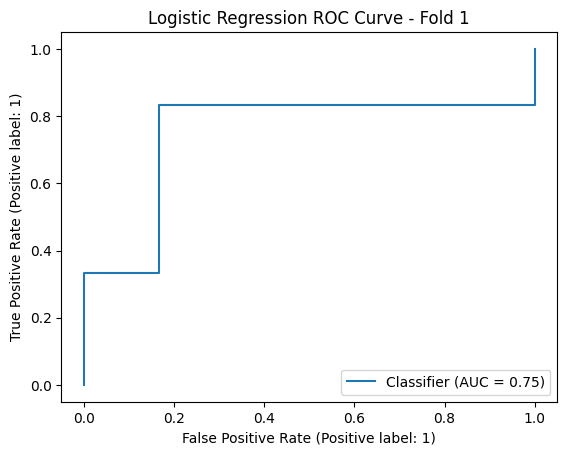

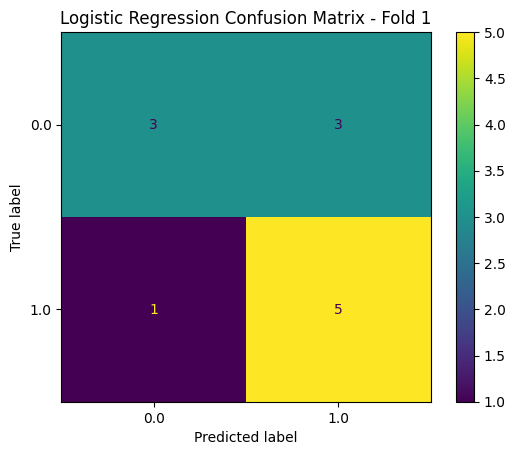

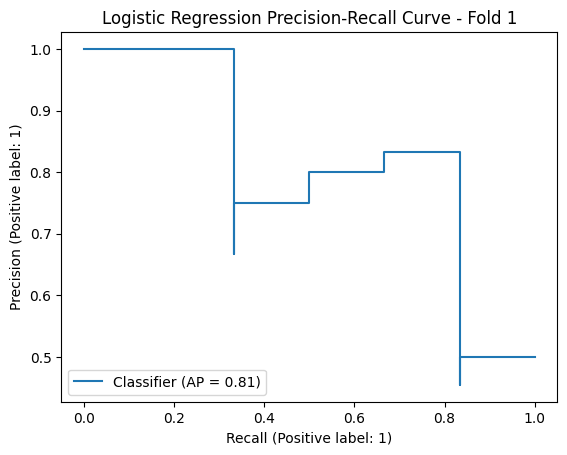

k-NN Predictions: [0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.]


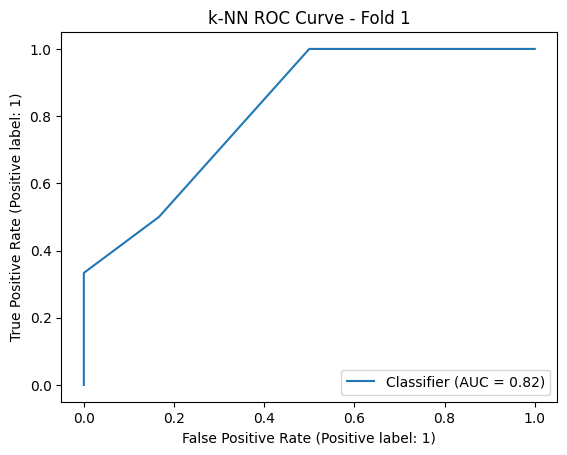

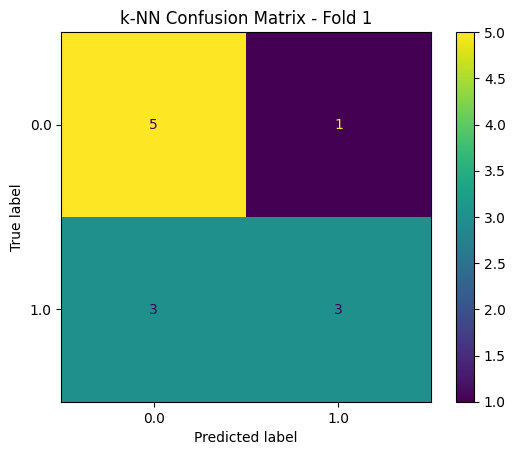

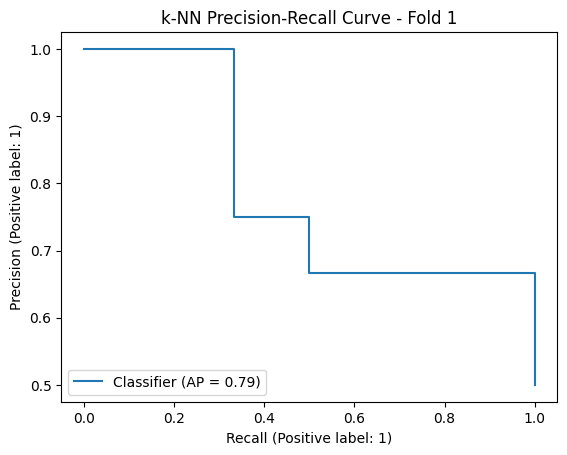

Random Forest Predictions: [0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.]


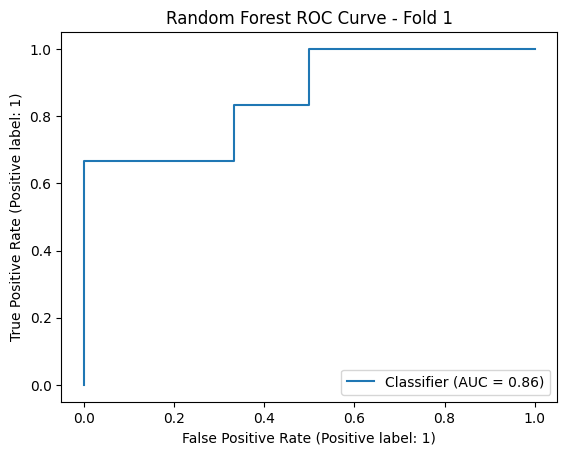

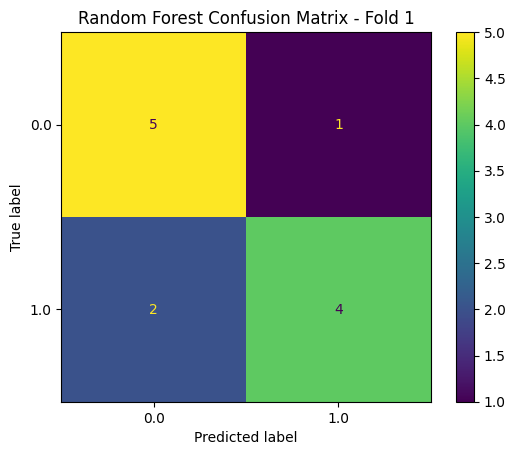

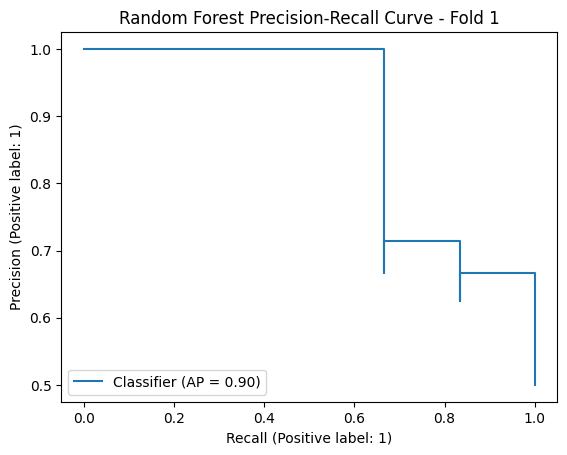

Fold 2 - TRAIN: [ 0  1  2  3  5  7  9 10 11 12 13 14 15 16 18 20 21 22 23 24 25 26 27 28
 29 32 33 34 35 37 38 39 40 41 42 43 45 46 47 48 49 51 52 53 56 57 58] TEST: [ 4  6  8 17 19 30 31 36 44 50 54 55]
Logistic Regression Predictions: [0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0.]


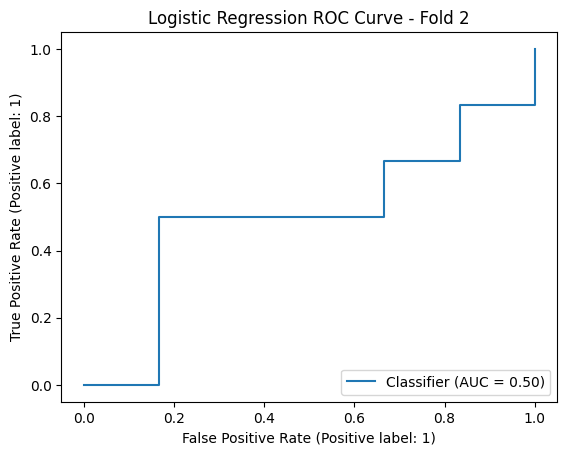

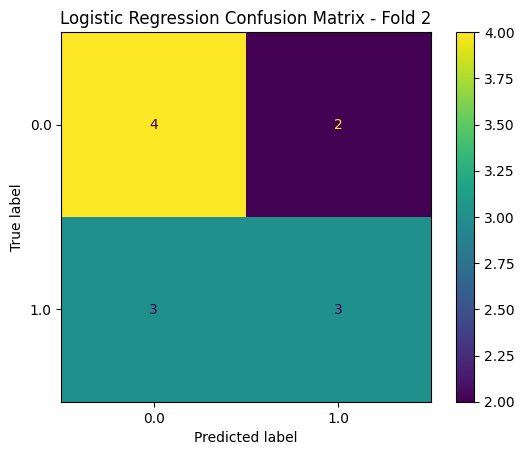

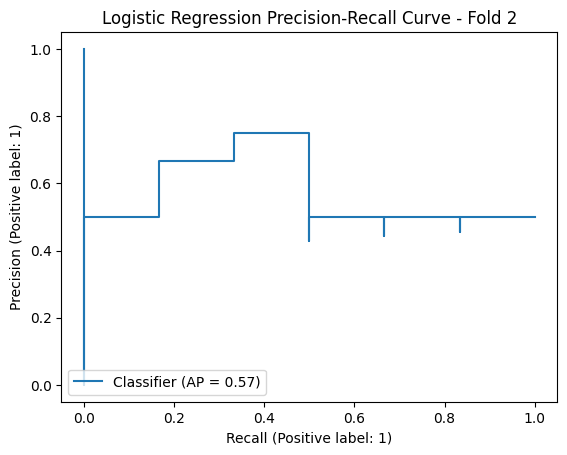

k-NN Predictions: [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


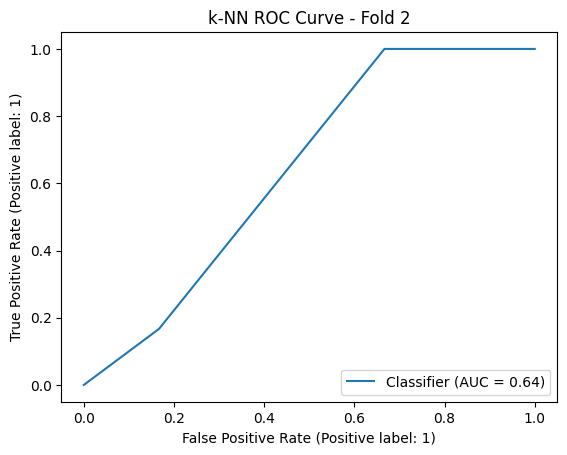

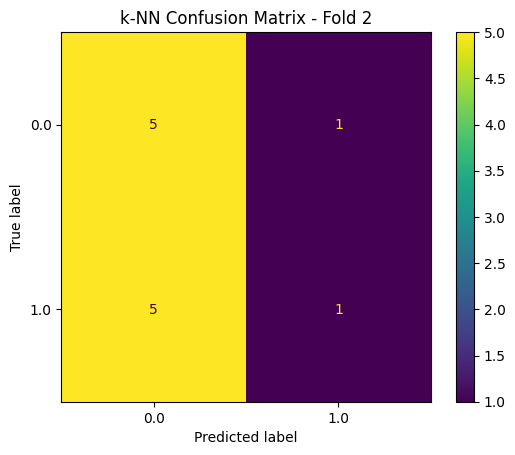

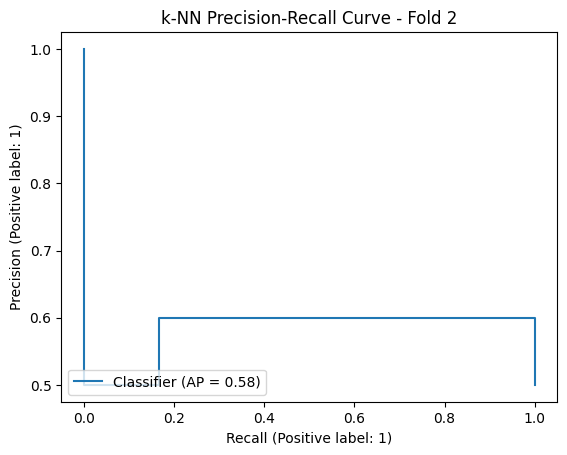

Random Forest Predictions: [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]


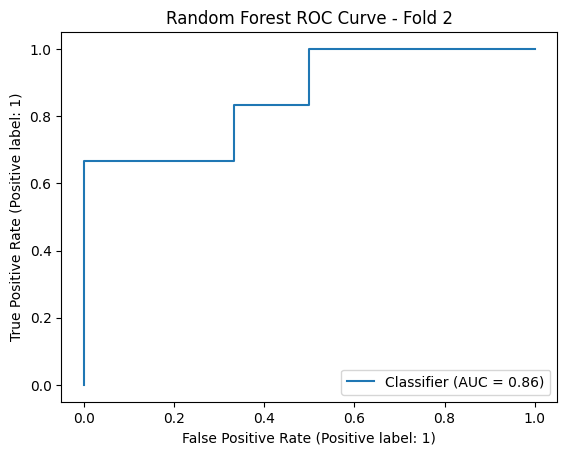

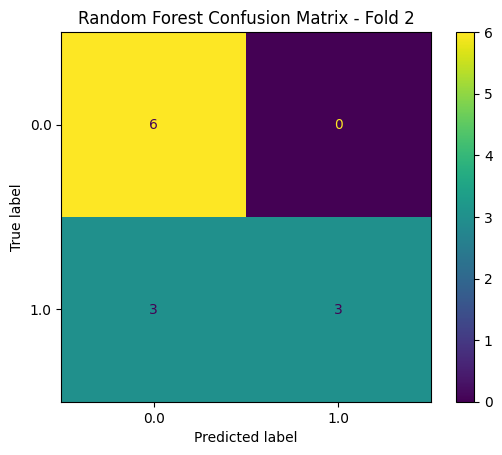

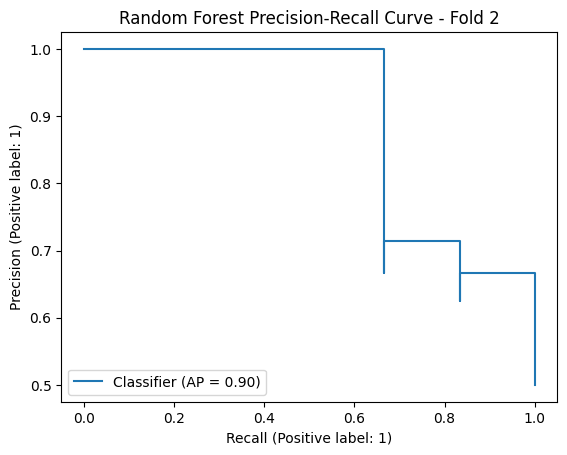

Fold 3 - TRAIN: [ 0  1  2  3  4  5  6  7  8 10 12 13 14 17 18 19 20 21 22 23 25 28 29 30
 31 34 35 36 37 38 39 40 42 43 44 45 46 47 48 49 50 51 53 54 55 57 58] TEST: [ 9 11 15 16 24 26 27 32 33 41 52 56]
Logistic Regression Predictions: [1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0.]


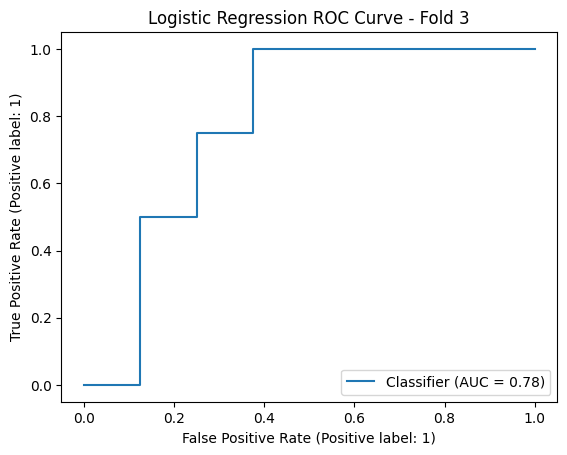

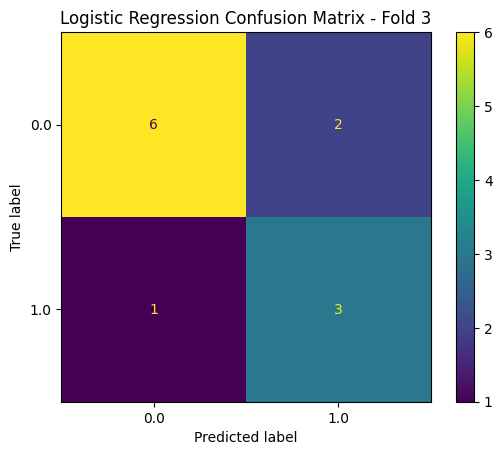

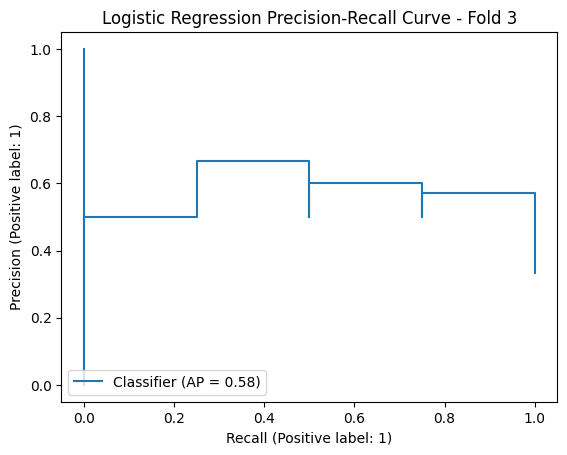

k-NN Predictions: [1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]


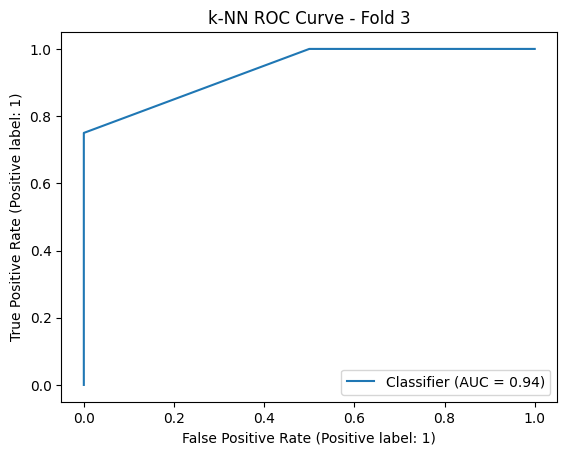

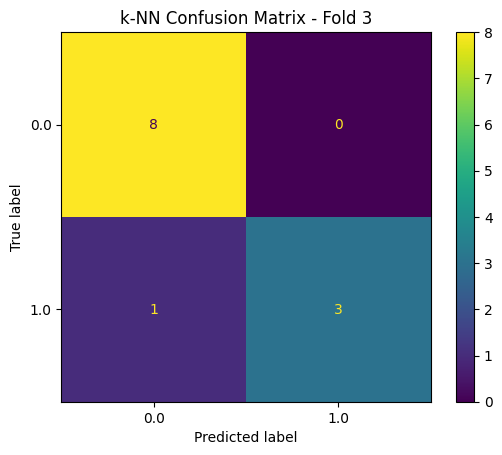

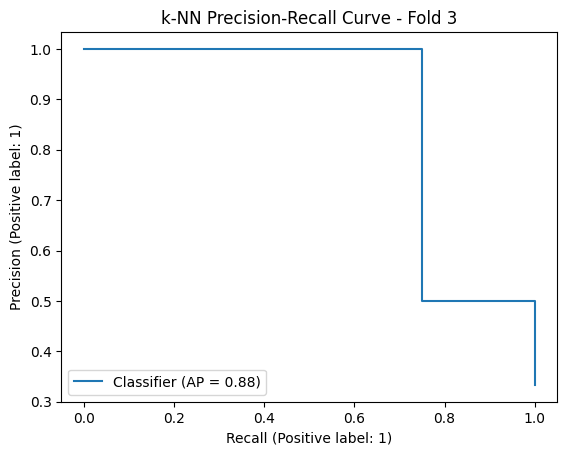

Random Forest Predictions: [1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0.]


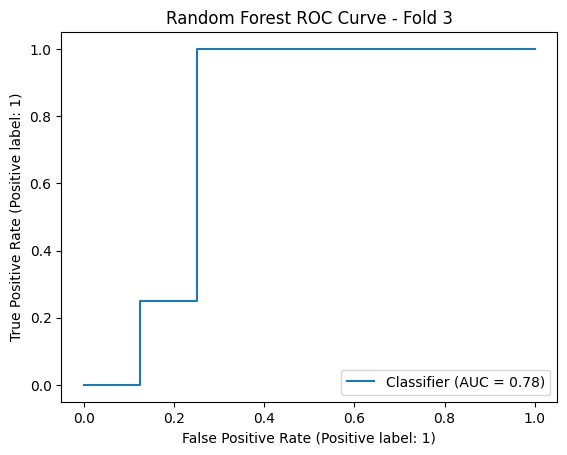

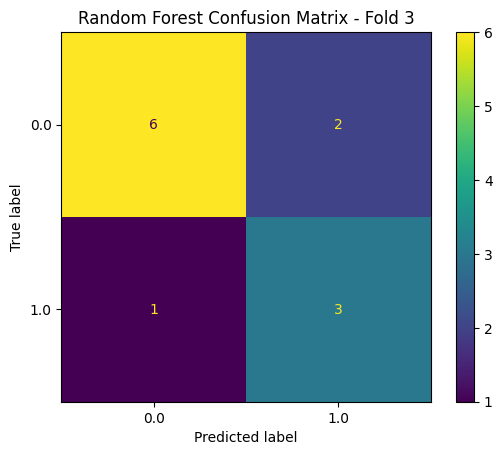

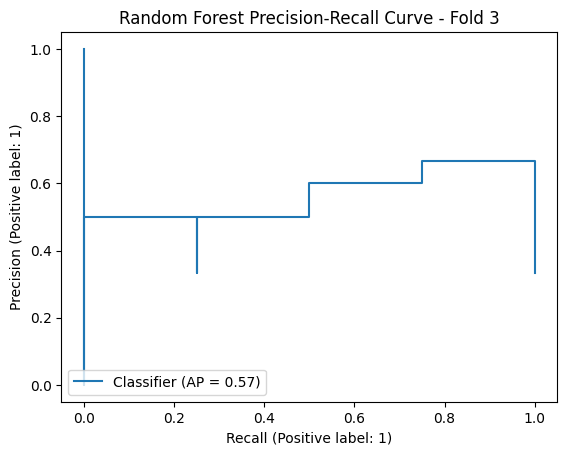

Fold 4 - TRAIN: [ 0  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 24 25 26 27
 28 30 31 32 33 34 36 38 41 42 44 45 47 49 50 51 52 53 54 55 56 57 58] TEST: [ 1  2 21 23 29 35 37 39 40 43 46 48]
Logistic Regression Predictions: [1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1.]


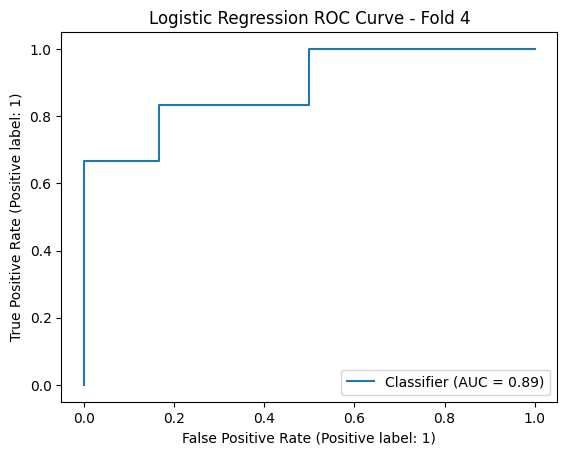

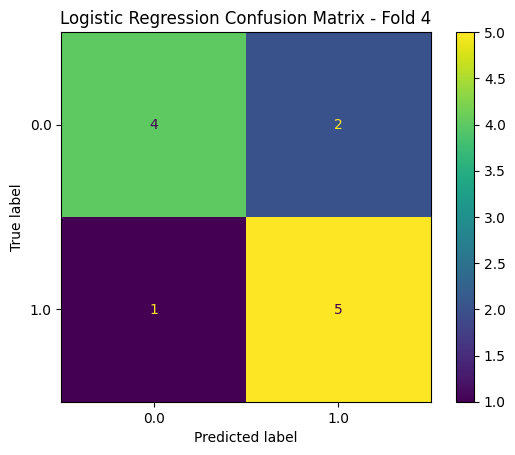

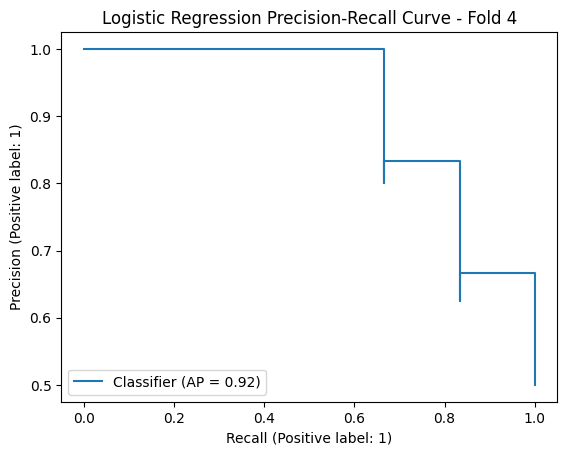

k-NN Predictions: [1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1.]


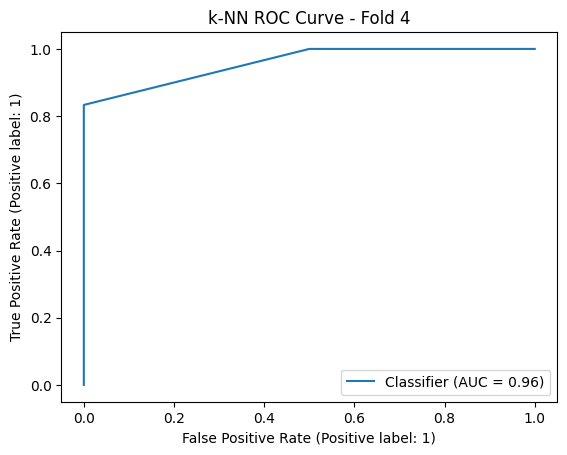

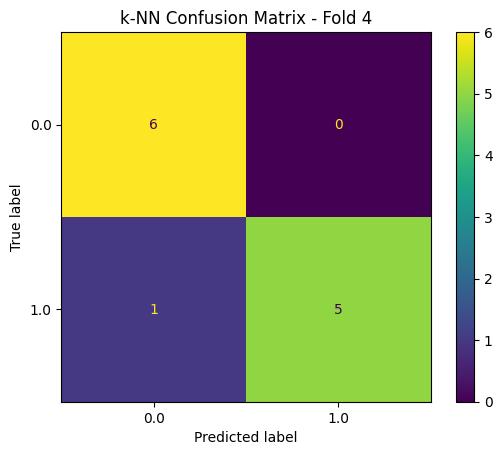

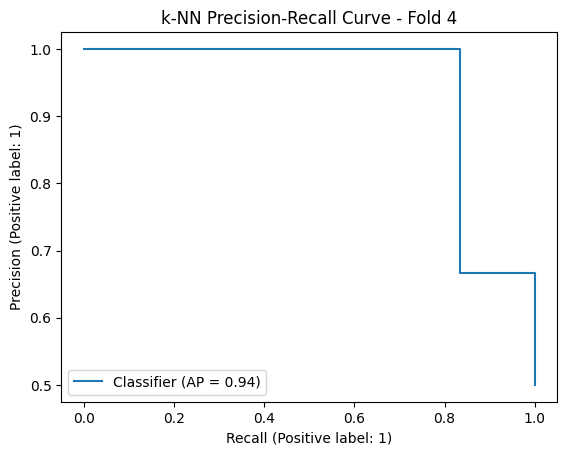

Random Forest Predictions: [1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]


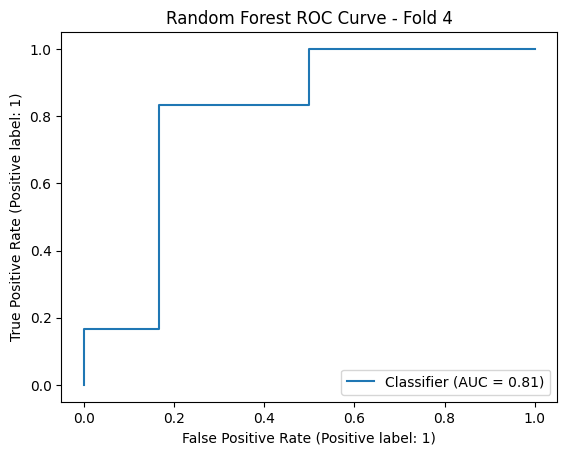

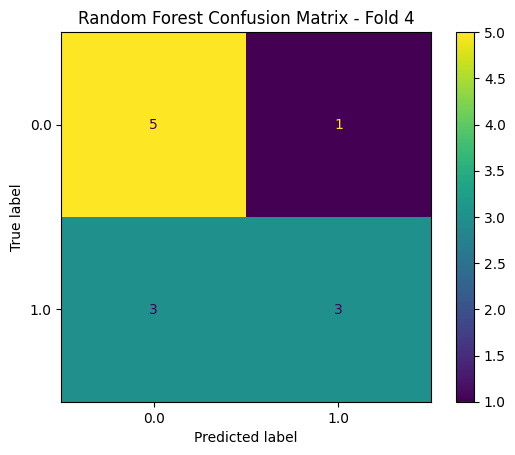

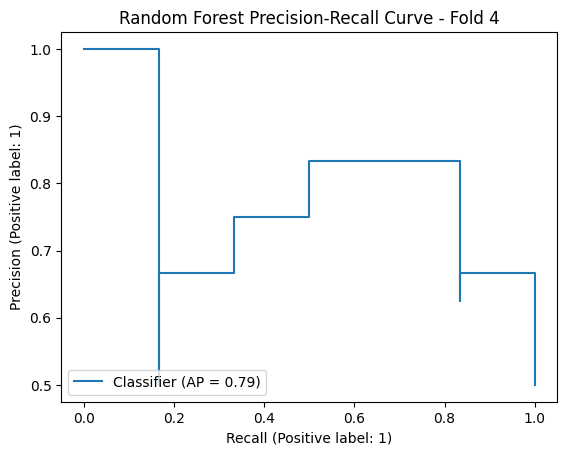

Fold 5 - TRAIN: [ 0  1  2  3  4  5  6  8  9 11 12 13 15 16 17 19 21 23 24 25 26 27 29 30
 31 32 33 34 35 36 37 39 40 41 43 44 45 46 47 48 49 50 52 53 54 55 56 57] TEST: [ 7 10 14 18 20 22 28 38 42 51 58]
Logistic Regression Predictions: [1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0.]


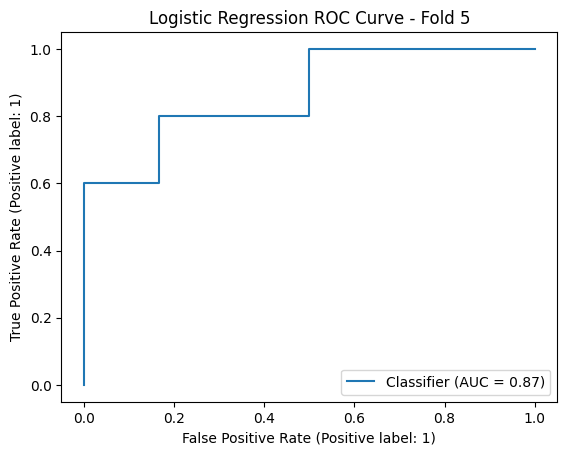

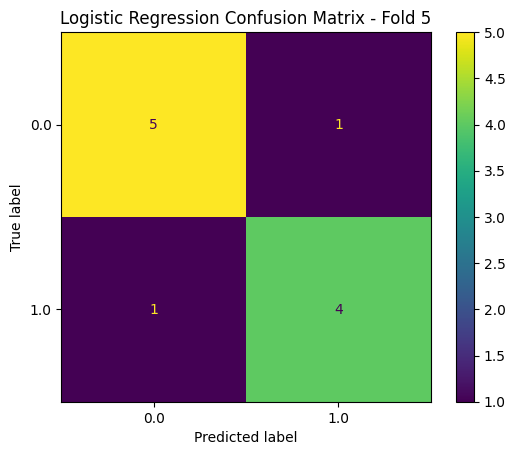

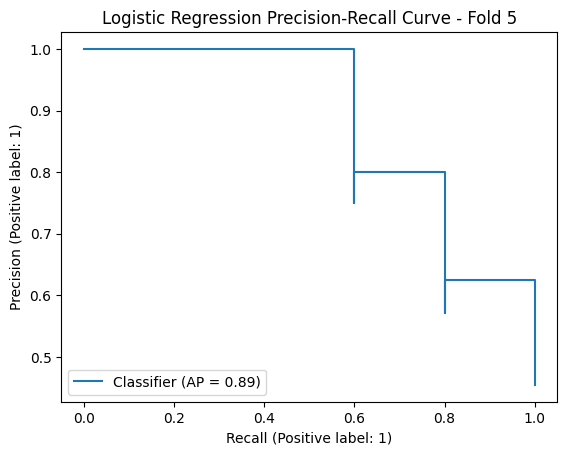

k-NN Predictions: [1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0.]


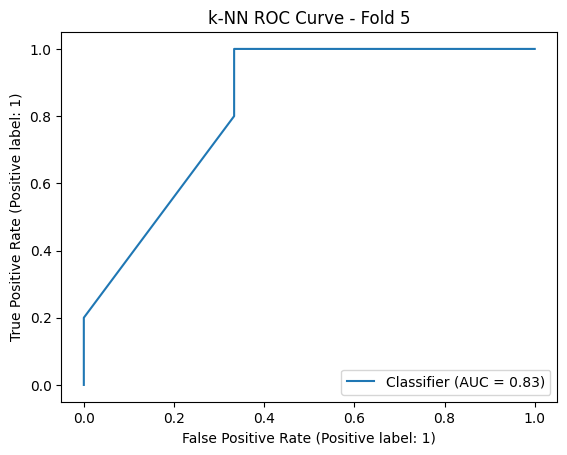

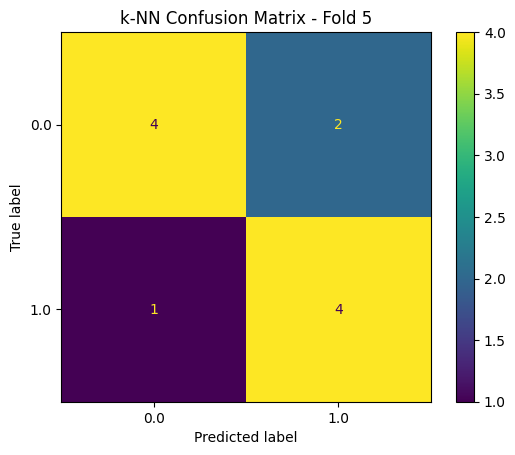

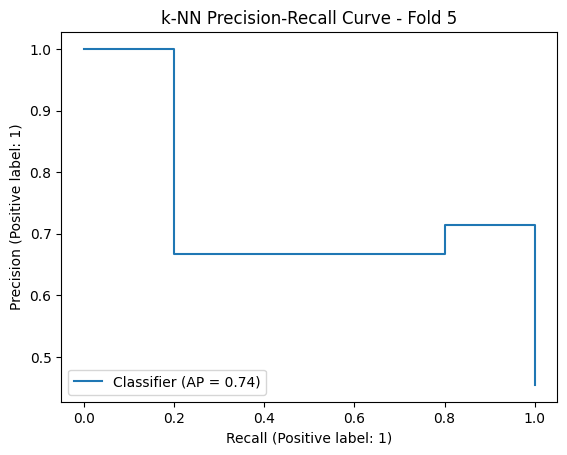

Random Forest Predictions: [0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]


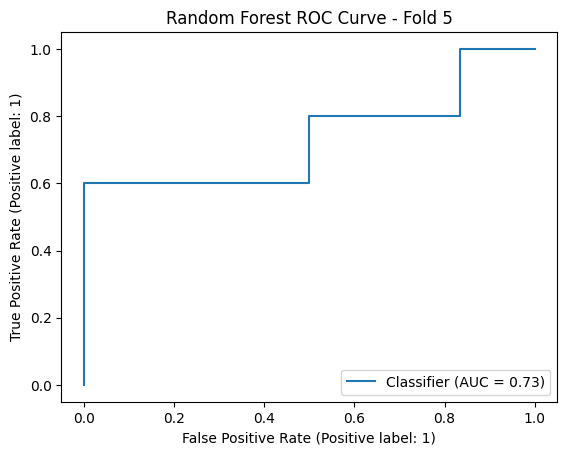

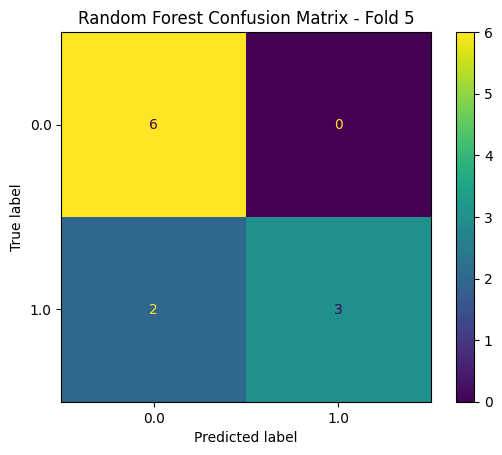

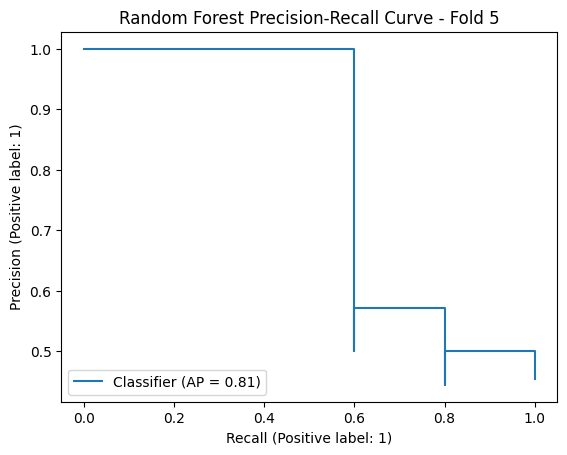


LR Mean train score: 1.0
LR Mean test score: 0.7136363636363636

KNN Mean train score: 0.8304078014184396
KNN Mean test score: 0.7454545454545454

RF train score: 1.0
RF Mean test score: 0.746969696969697


In [28]:
# Perform the cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X_clr), 1):
    print(f"Fold {fold} - TRAIN:", train_index, "TEST:", test_index)
    # Splitting the data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Standardization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)  
    X_test = scaler.transform(X_test)  
          
    # Logistic Regression
    #-----------------------------------------------------------------------#
    LR = LogisticRegression(random_state=42).fit(X_train, y_train)
    score_tr_LR = LR.score(X_train, y_train)
    score_te_LR = LR.score(X_test, y_test)
    scores_train_LR.append(score_tr_LR)
    scores_test_LR.append(score_te_LR)
    y_pred_LR = LR.predict(X_test)
    print("Logistic Regression Predictions:", y_pred_LR)
    
    # ROC curve forLR
    y_prob_LR = LR.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_prob_LR)
    plt.title(f'Logistic Regression ROC Curve - Fold {fold}')
    plt.show()
    
    # Confusion Matrix for LR
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_LR)
    plt.title(f'Logistic Regression Confusion Matrix - Fold {fold}')
    plt.show()
    
    # Precision-Recall curve for LR
    PrecisionRecallDisplay.from_predictions(y_test, y_prob_LR)
    plt.title(f'Logistic Regression Precision-Recall Curve - Fold {fold}')
    plt.show()
    
    # KNN
    #-----------------------------------------------------------------------#
    knn = KNeighborsClassifier().fit(X_train, y_train)
    score_tr_KNN = knn.score(X_train, y_train)
    score_te_KNN = knn.score(X_test, y_test)
    scores_train_KNN.append(score_tr_KNN)
    scores_test_KNN.append(score_te_KNN)
    y_pred_KNN = knn.predict(X_test)
    print("k-NN Predictions:", y_pred_KNN)
    
    # ROC curve for KNN
    y_prob_KNN = knn.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_prob_KNN)
    plt.title(f'k-NN ROC Curve - Fold {fold}')
    plt.show()
    
    # Confusion Matrix for KNN
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_KNN)
    plt.title(f'k-NN Confusion Matrix - Fold {fold}')
    plt.show()
    
    # Precision-Recall curve for KNN
    PrecisionRecallDisplay.from_predictions(y_test, y_prob_KNN)
    plt.title(f'k-NN Precision-Recall Curve - Fold {fold}')
    plt.show()
    
    # Random Forest
    #-----------------------------------------------------------------------#
    rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
    score_tr_RF = rf.score(X_train, y_train)
    score_te_RF = rf.score(X_test, y_test)
    scores_train_RF.append(score_tr_RF)
    scores_test_RF.append(score_te_RF)
    y_pred_RF = rf.predict(X_test)
    print("Random Forest Predictions:", y_pred_RF)
    
    # ROC curve for RF
    y_prob_RF = rf.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_prob_RF)
    plt.title(f'Random Forest ROC Curve - Fold {fold}')
    plt.show()
    
    # Confusion Matrix for RF
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_RF)
    plt.title(f'Random Forest Confusion Matrix - Fold {fold}')
    plt.show()
    
    # Precision-Recall curve for RF
    PrecisionRecallDisplay.from_predictions(y_test, y_prob_RF)
    plt.title(f'Random Forest Precision-Recall Curve - Fold {fold}')
    plt.show()

print()
print("LR Mean train score:", np.mean(scores_train_LR))
print("LR Mean test score:", np.mean(scores_test_LR))
print()
print("KNN Mean train score:", np.mean(scores_train_KNN))
print("KNN Mean test score:", np.mean(scores_test_KNN))
print()
print("RF train score:", np.mean(scores_train_RF))
print("RF Mean test score:", np.mean(scores_test_RF))

## Preliminary Modeling with Demographics

In [17]:
display(df_onehot)

Age    BMI    SSPG  phylum_Actinobacteria  phylum_Bacteroidetes  \
0   58.65  31.24  162.00               0.013645              0.582611   
1   49.69  28.24   75.00               0.002822              0.260515   
2   57.72  28.89  234.00               0.047996              0.134357   
3   50.02  26.94   40.00               0.005159              0.333832   
4   66.08  32.54   65.00               0.003147              0.353603   
5   61.95  30.59  174.00               0.000936              0.444029   
6   62.88  32.94  220.00               0.004373              0.695161   
7   64.56  26.69   99.00               0.003209              0.665174   
8   67.90  29.53   62.00               0.038886              0.159581   
9   50.90  26.86   70.00               0.001151              0.514665   
10  51.13  29.31  175.00               0.011758              0.651818   
11  60.71  34.15  235.00               0.016343              0.264312   
12  38.80  22.51   92.00               0.009740              0.256027   
13  54.74  27.33  130.00               0.003120              0.161809   
14  61.00  29.99  221.00               0.003967              0.558101   
15  60.18  26.00  160.00               0.003706              0.563410   
16  45.43  26.71  212.13               0.001617              0.509769   
17  54.16  31.28  117.00               0.004685              0.489099   
18  59.25  23.82   87.00               0.004121              0.426074   
19  66.81  33.32  148.00               0.012615              0.474929   
20  67.47  30.18  133.50               0.001278              0.680192   
21  60.18  32.21  140.00               0.023451              0.255514   
22  44.81  34.49  184.00               0.001513              0.601481   
23  59.48  21.47   91.50               0.005518              0.481819   
24  54.02  24.99   93.00               0.003676              0.391459   
25  52.33  24.44   57.00               0.005047              0.529579   
26  68.82  25.99  159.00               0.000445              0.362055   
27  54.39  32.29  104.00               0.000902              0.542390   
28  65.41  29.41   62.00               0.001867              0.483669   
29  52.94  23.31  222.00               0.007785              0.550382   
30  52.46  25.20  161.00               0.002488              0.553189   
31  53.68  38.90  223.00               0.006390              0.361850   
32  56.13  24.54  129.00               0.011910              0.526379   
33  61.94  29.47  224.60               0.003191              0.537843   
34  63.04  24.07  155.37               0.002676              0.553330   
35  48.32  27.91   76.00               0.003423              0.806917   
36  40.98  23.16   90.00               0.014823              0.427930   
37  45.43  33.30  162.00               0.000940              0.913461   
38  44.00  29.41  225.00               0.003962              0.200566   
39  54.37  33.46  220.00               0.027102              0.392654   
40  56.73  24.66  100.50               0.000035              0.718804   
41  58.19  27.59  220.00               0.004626              0.013236   
42  60.50  25.19   58.00               0.005306              0.169443   
43  57.04  28.68  250.00               0.000810              0.448811   
44  47.52  27.49  217.80               0.001905              0.543614   
45  50.98  25.72  110.88               0.019231              0.660372   
46  51.58  28.81  190.00               0.001224              0.591687   
47  44.41  24.01   67.13               0.000286              0.521887   
48  54.36  29.25   51.00               0.010238              0.115068   
49  55.86  28.63  178.75               0.000997              0.261701   
50  67.09  28.40  174.00               0.000154              0.589315   
51  62.92  30.79  257.50               0.000406              0.603685   
52  62.80  33.96  191.00               0.003672              0.562503   
53  63.26  31.41  274.00               0.000592              0.5

In [38]:
# Dropping the SSPG

df= df_onehot.drop(columns=['SSPG'])

phylum_columns = df.filter(like='phylum').columns
df_phylum = df[phylum_columns]

X = df_phylum.values
y = df['IR_IS_IS'].values

In [33]:
display(df.columns)

Index(['Age', 'BMI', 'phylum_Actinobacteria', 'phylum_Bacteroidetes',
       'phylum_Firmicutes', 'phylum_Proteobacteria', 'phylum_Verrucomicrobia',
       'phylum_unclassified_Bacteria', 'class_Actinobacteria', 'class_Bacilli',
       ...
       'genus_unclassified_Porphyromonadaceae',
       'genus_unclassified_Ruminococcaceae', 'Sex_M', 'Class_Crossover',
       'Class_Diabetic', 'Class_Prediabetic', 'Race_B', 'Race_C', 'Race_H',
       'IR_IS_IS'],
      dtype='object', length=106)

In [34]:
X = df.iloc[:, :-1].values 
y = df['IR_IS_IS'].values

Fold 1 - TRAIN: [ 1  2  4  6  7  8  9 10 11 14 15 16 17 18 19 20 21 22 23 24 26 27 28 29
 30 31 32 33 35 36 37 38 39 40 41 42 43 44 46 48 50 51 52 54 55 56 58] TEST: [ 0  3  5 12 13 25 34 45 47 49 53 57]
Logistic Regression Predictions: [0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.]


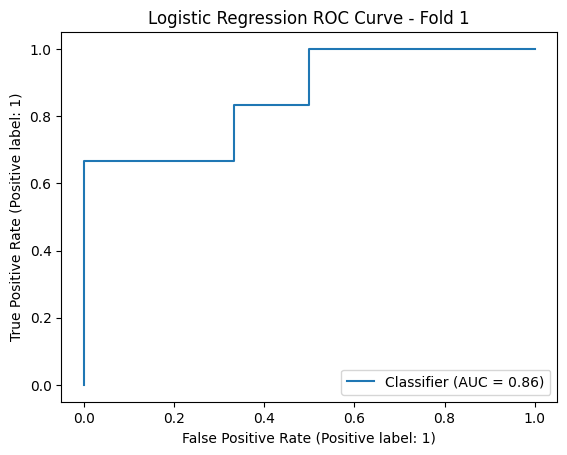

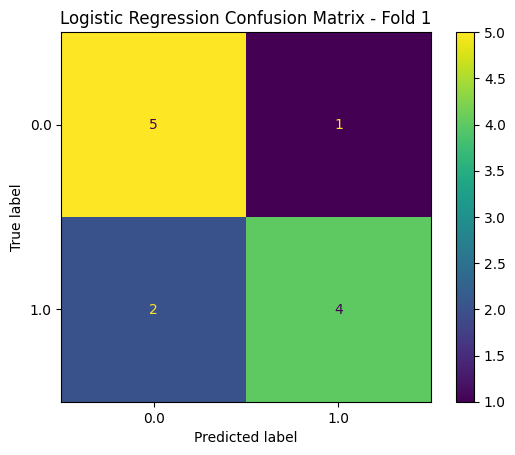

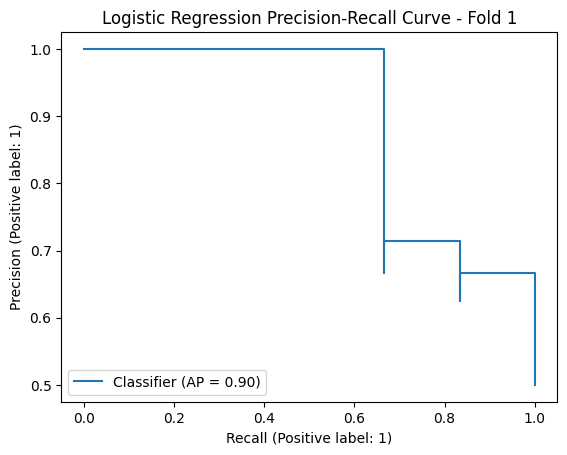

k-NN Predictions: [0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1.]


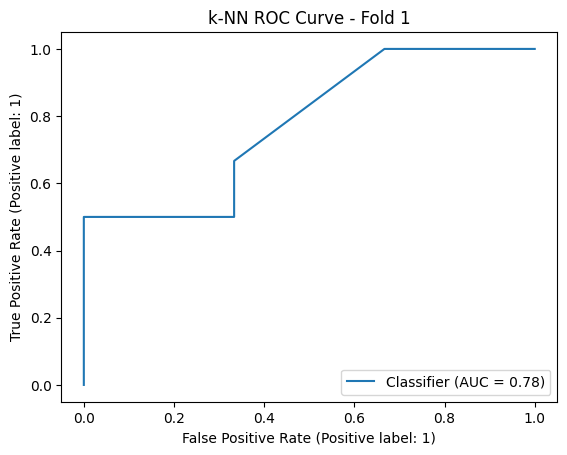

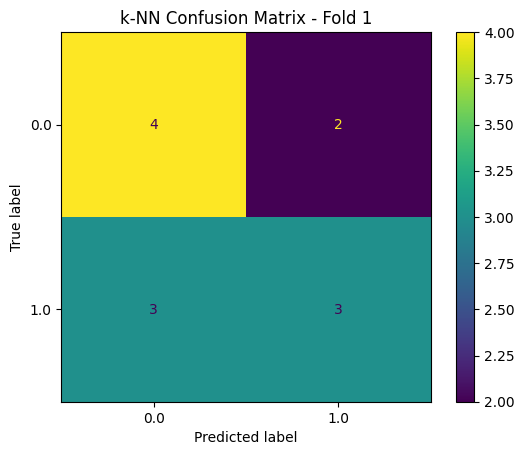

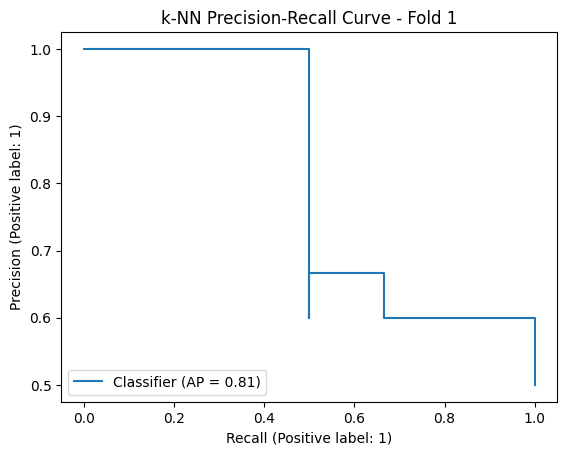

Random Forest Predictions: [0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.]


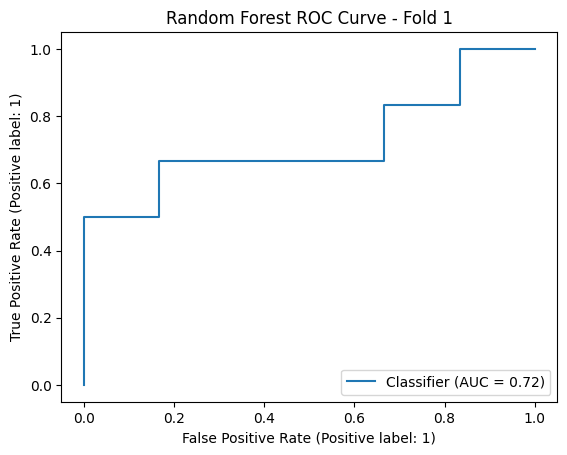

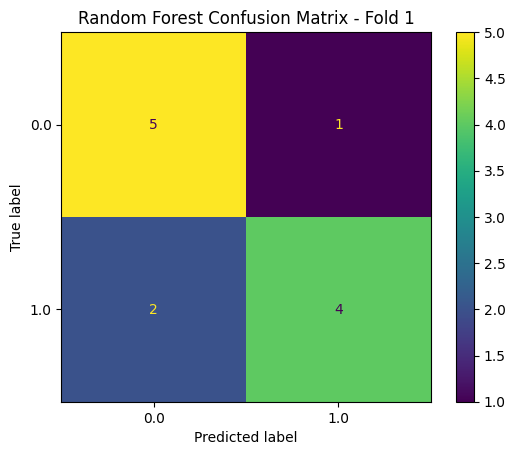

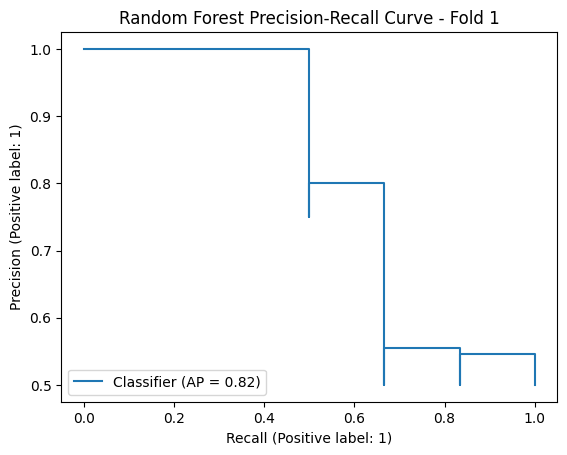

Fold 2 - TRAIN: [ 0  1  2  3  5  7  9 10 11 12 13 14 15 16 18 20 21 22 23 24 25 26 27 28
 29 32 33 34 35 37 38 39 40 41 42 43 45 46 47 48 49 51 52 53 56 57 58] TEST: [ 4  6  8 17 19 30 31 36 44 50 54 55]
Logistic Regression Predictions: [1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]


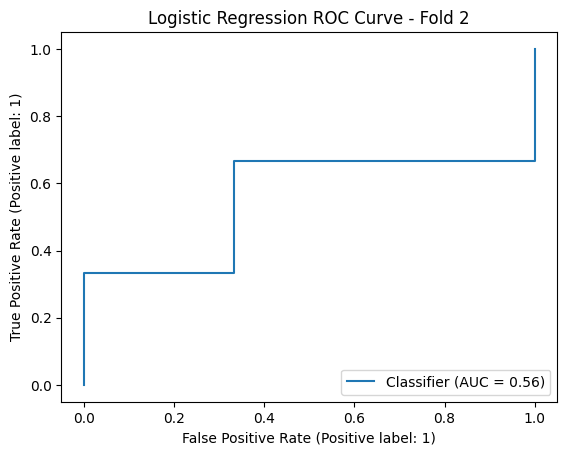

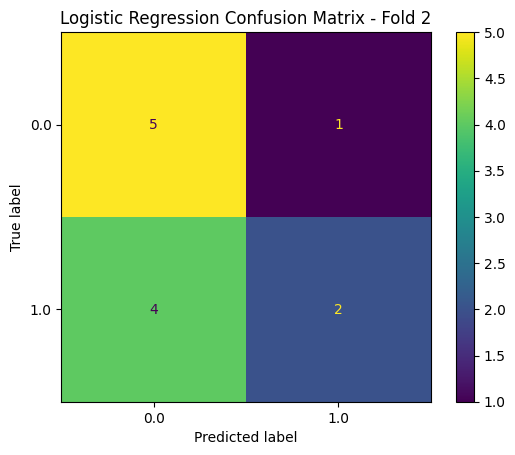

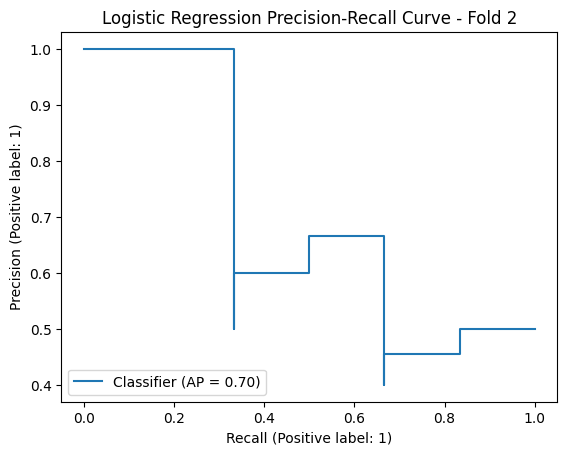

k-NN Predictions: [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


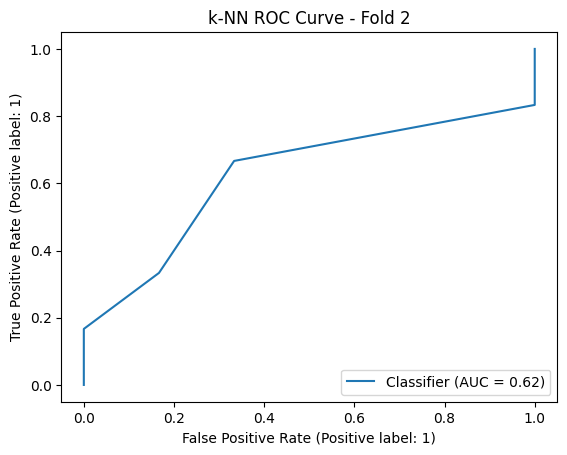

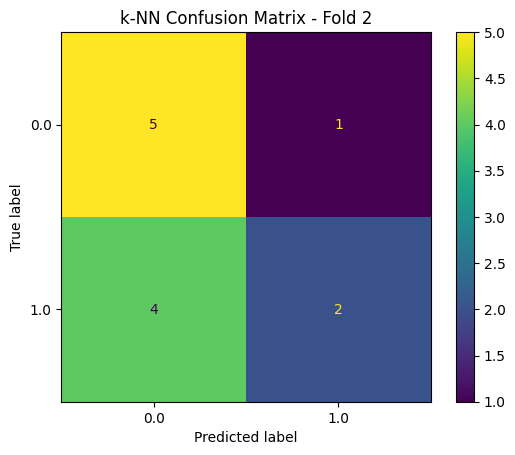

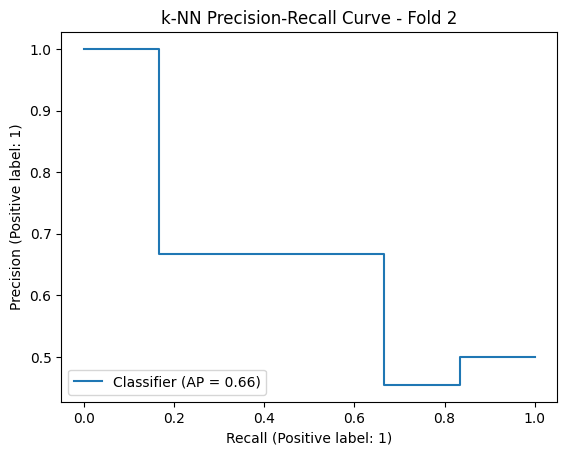

Random Forest Predictions: [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


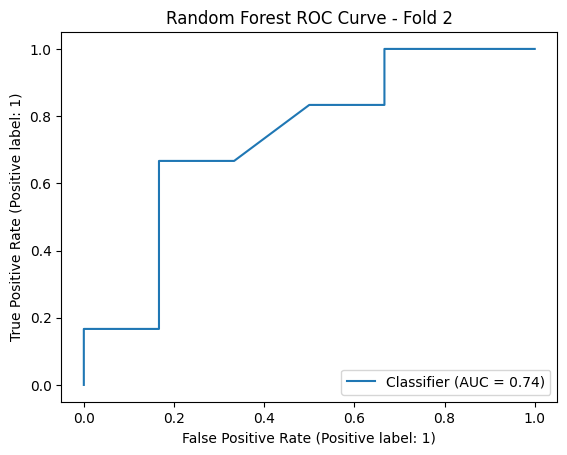

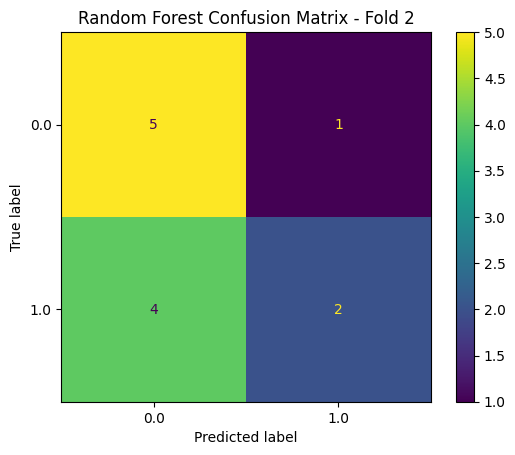

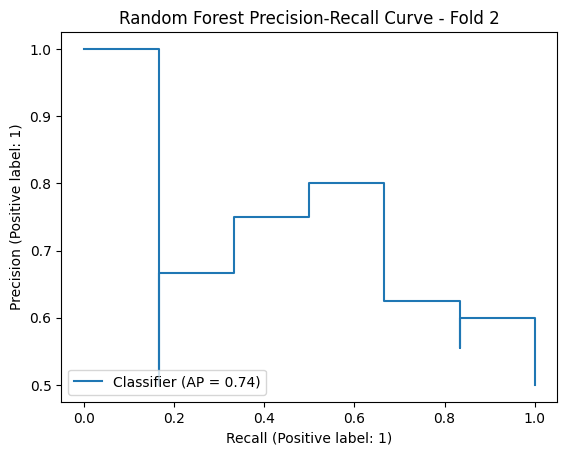

Fold 3 - TRAIN: [ 0  1  2  3  4  5  6  7  8 10 12 13 14 17 18 19 20 21 22 23 25 28 29 30
 31 34 35 36 37 38 39 40 42 43 44 45 46 47 48 49 50 51 53 54 55 57 58] TEST: [ 9 11 15 16 24 26 27 32 33 41 52 56]
Logistic Regression Predictions: [0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.]


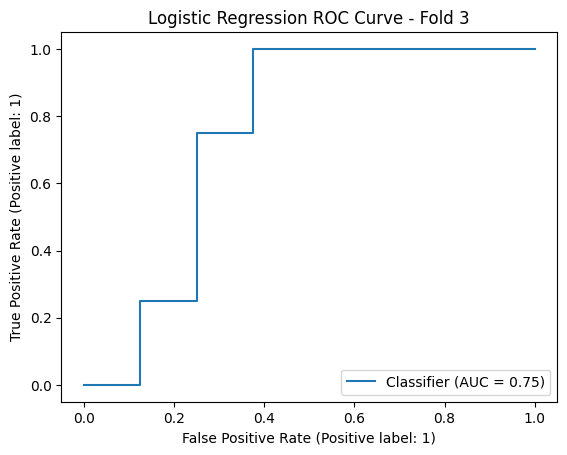

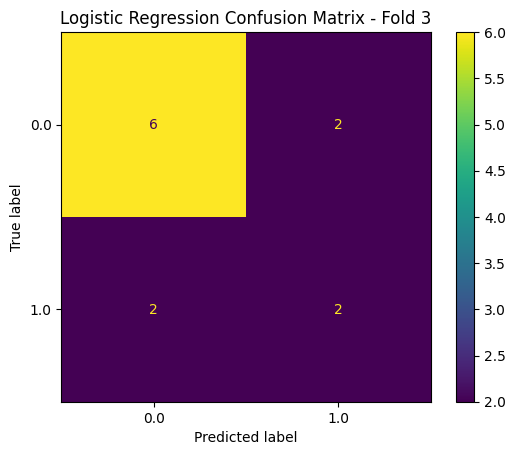

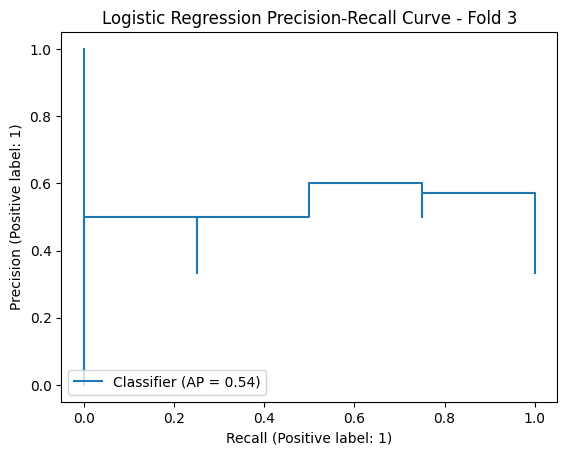

k-NN Predictions: [0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


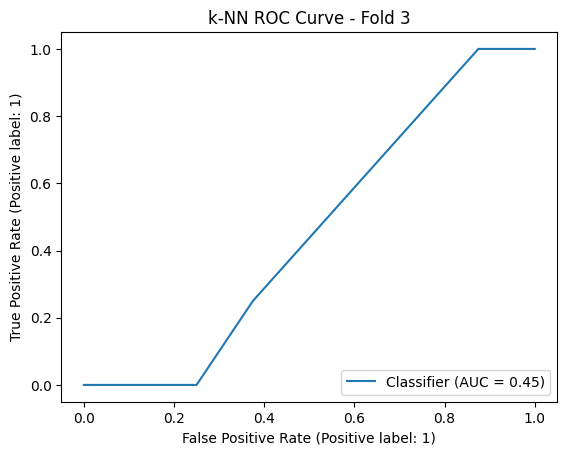

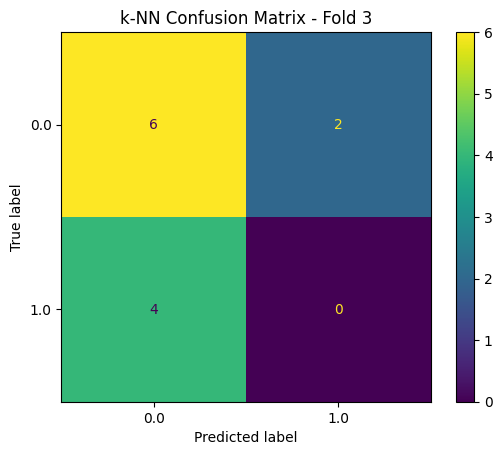

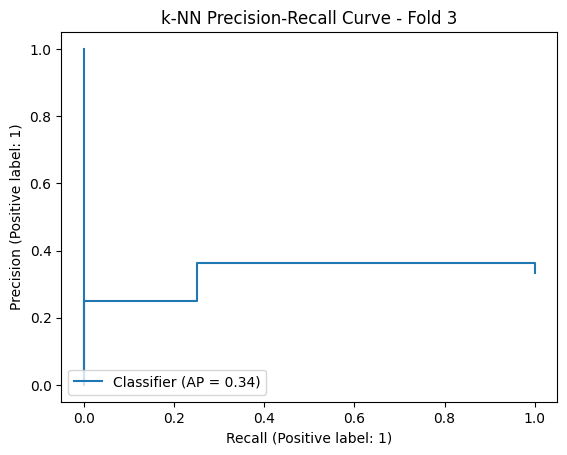

Random Forest Predictions: [0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]


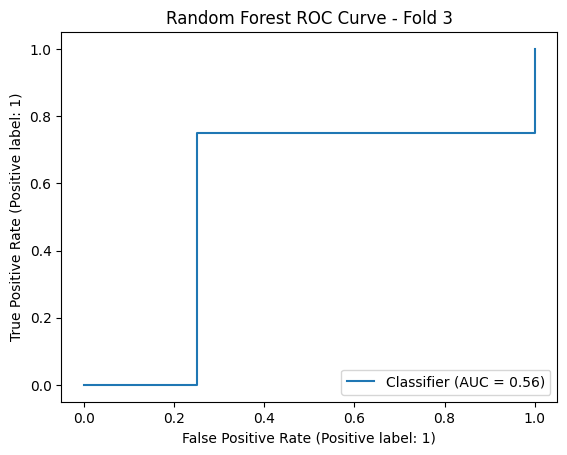

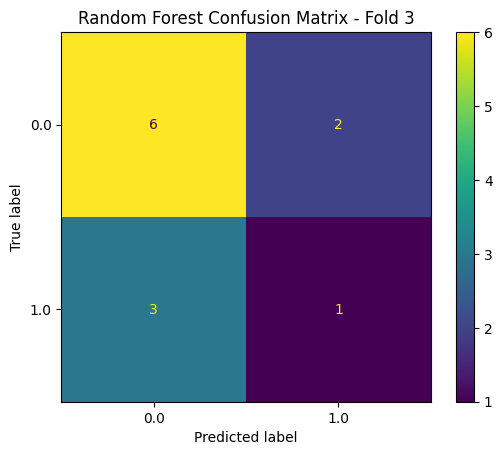

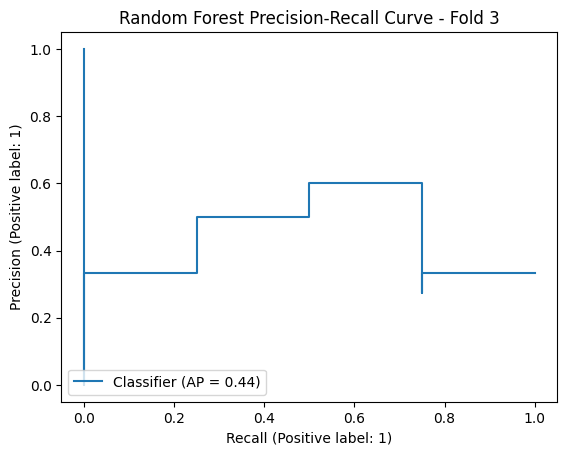

Fold 4 - TRAIN: [ 0  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 24 25 26 27
 28 30 31 32 33 34 36 38 41 42 44 45 47 49 50 51 52 53 54 55 56 57 58] TEST: [ 1  2 21 23 29 35 37 39 40 43 46 48]
Logistic Regression Predictions: [0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1.]


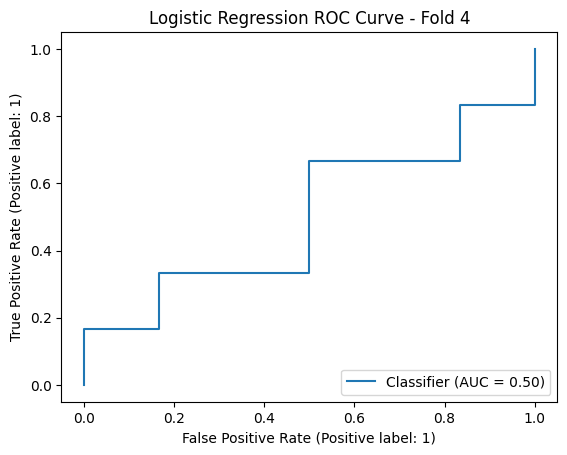

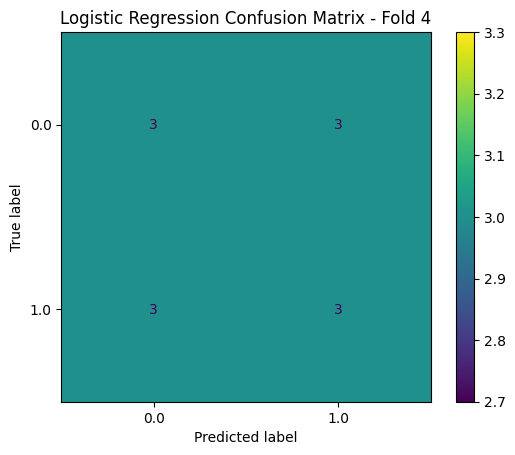

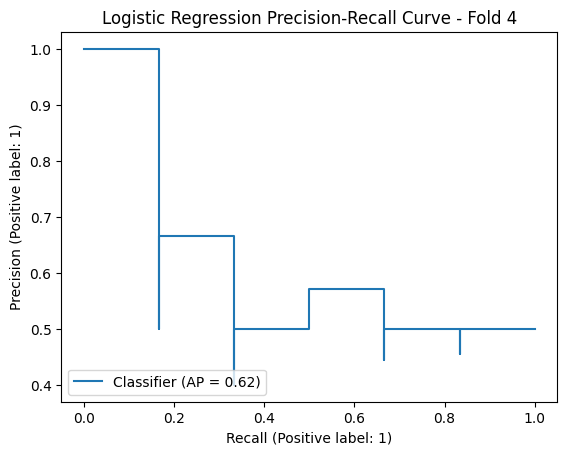

k-NN Predictions: [1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0.]


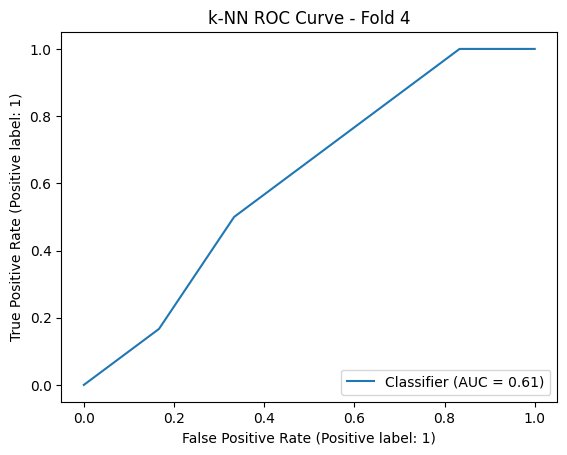

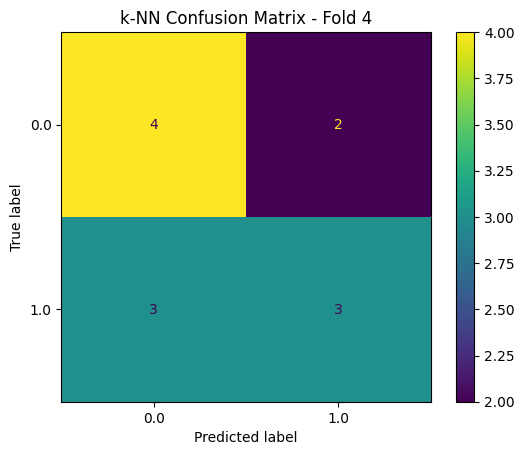

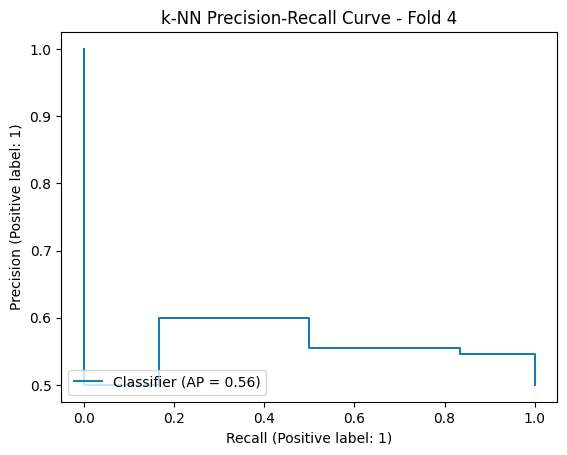

Random Forest Predictions: [1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1.]


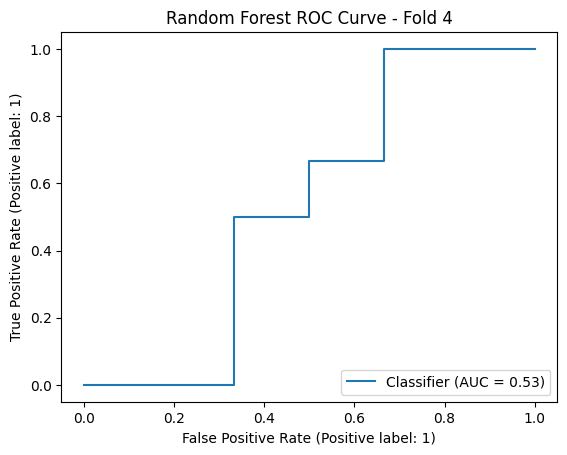

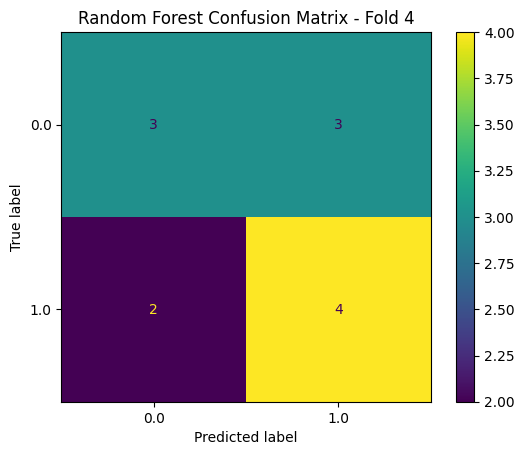

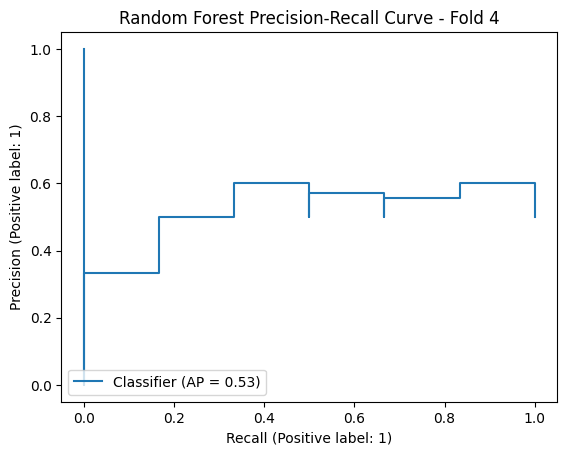

Fold 5 - TRAIN: [ 0  1  2  3  4  5  6  8  9 11 12 13 15 16 17 19 21 23 24 25 26 27 29 30
 31 32 33 34 35 36 37 39 40 41 43 44 45 46 47 48 49 50 52 53 54 55 56 57] TEST: [ 7 10 14 18 20 22 28 38 42 51 58]
Logistic Regression Predictions: [1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]


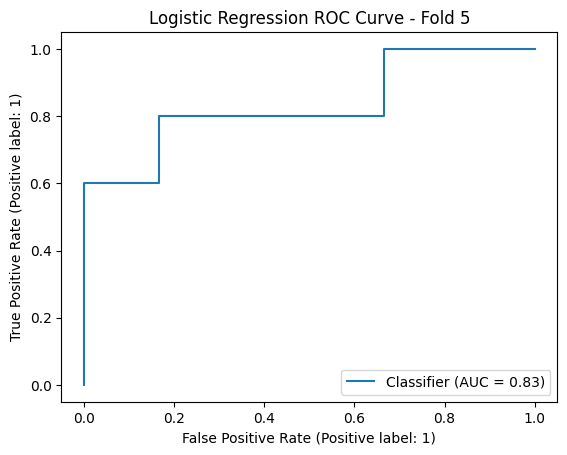

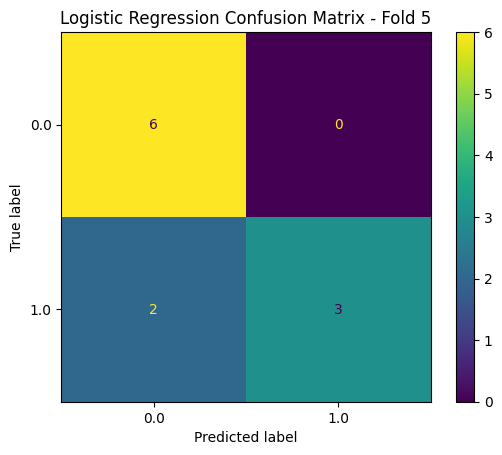

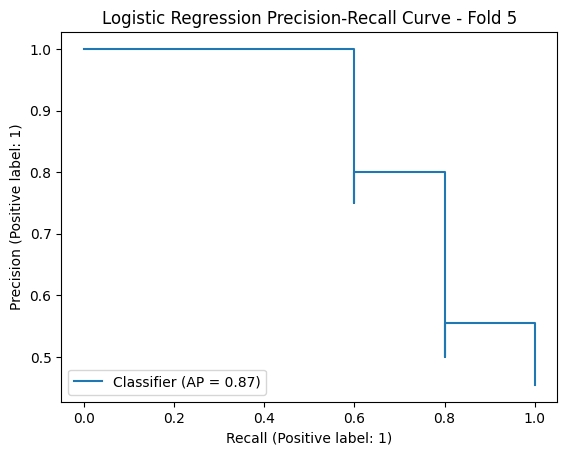

k-NN Predictions: [1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]


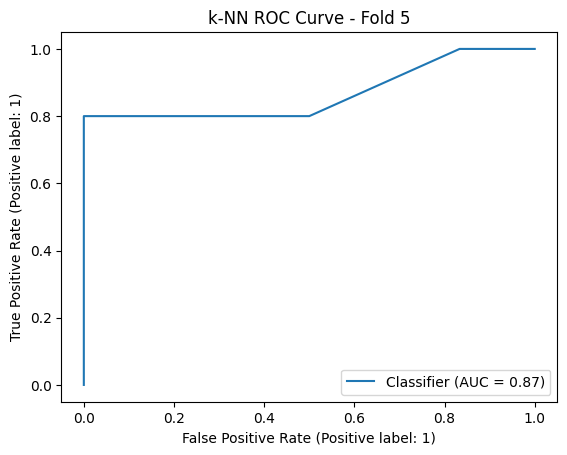

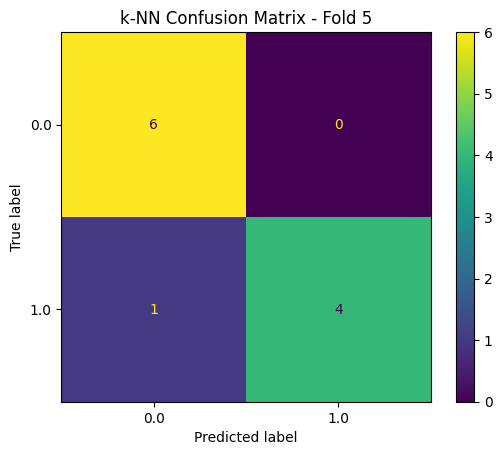

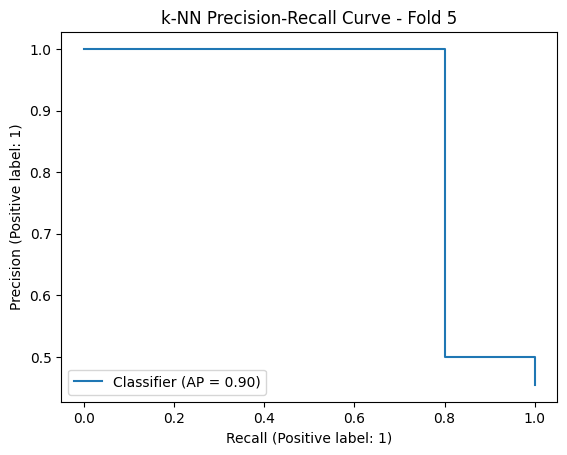

Random Forest Predictions: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


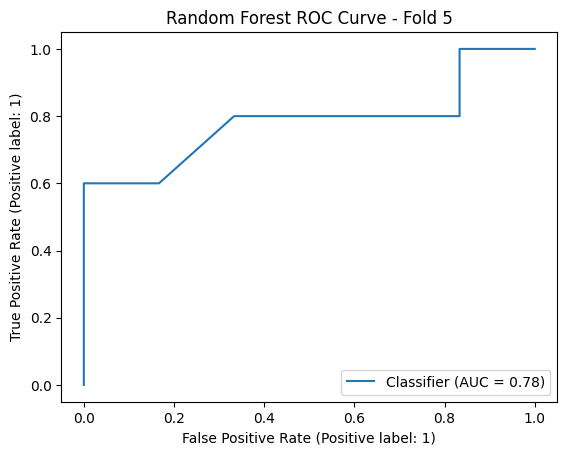

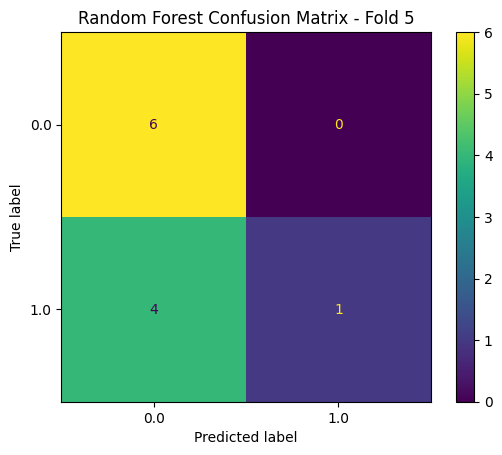

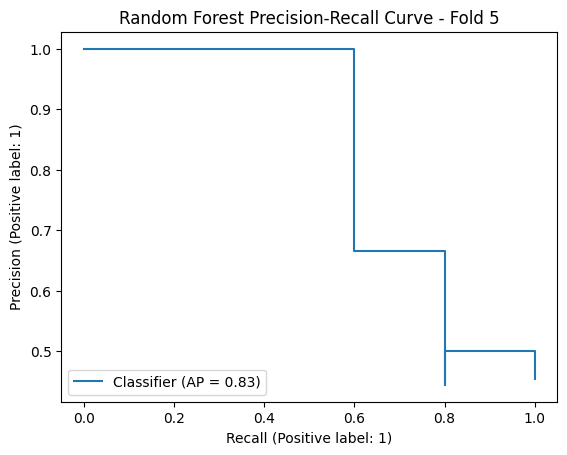


LR Mean train score: 0.9153368794326241
LR Mean test score: 0.6681818181818182

KNN Mean train score: 0.7994976359338061
KNN Mean test score: 0.7297979797979798

RF train score: 1.0
RF Mean test score: 0.6843434343434345


In [39]:
# Perform the cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    print(f"Fold {fold} - TRAIN:", train_index, "TEST:", test_index)
    # Splitting the data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Standardization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)  
    X_test = scaler.transform(X_test)  
          
    # Logistic Regression
    #-----------------------------------------------------------------------#
    LR = LogisticRegression(random_state=42).fit(X_train, y_train)
    score_tr_LR = LR.score(X_train, y_train)
    score_te_LR = LR.score(X_test, y_test)
    scores_train_LR.append(score_tr_LR)
    scores_test_LR.append(score_te_LR)
    y_pred_LR = LR.predict(X_test)
    print("Logistic Regression Predictions:", y_pred_LR)
    
    # ROC curve forLR
    y_prob_LR = LR.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_prob_LR)
    plt.title(f'Logistic Regression ROC Curve - Fold {fold}')
    plt.show()
    
    # Confusion Matrix for LR
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_LR)
    plt.title(f'Logistic Regression Confusion Matrix - Fold {fold}')
    plt.show()
    
    # Precision-Recall curve for LR
    PrecisionRecallDisplay.from_predictions(y_test, y_prob_LR)
    plt.title(f'Logistic Regression Precision-Recall Curve - Fold {fold}')
    plt.show()
    
    # KNN
    #-----------------------------------------------------------------------#
    knn = KNeighborsClassifier().fit(X_train, y_train)
    score_tr_KNN = knn.score(X_train, y_train)
    score_te_KNN = knn.score(X_test, y_test)
    scores_train_KNN.append(score_tr_KNN)
    scores_test_KNN.append(score_te_KNN)
    y_pred_KNN = knn.predict(X_test)
    print("k-NN Predictions:", y_pred_KNN)
    
    # ROC curve for KNN
    y_prob_KNN = knn.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_prob_KNN)
    plt.title(f'k-NN ROC Curve - Fold {fold}')
    plt.show()
    
    # Confusion Matrix for KNN
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_KNN)
    plt.title(f'k-NN Confusion Matrix - Fold {fold}')
    plt.show()
    
    # Precision-Recall curve for KNN
    PrecisionRecallDisplay.from_predictions(y_test, y_prob_KNN)
    plt.title(f'k-NN Precision-Recall Curve - Fold {fold}')
    plt.show()
    
    # Random Forest
    #-----------------------------------------------------------------------#
    rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
    score_tr_RF = rf.score(X_train, y_train)
    score_te_RF = rf.score(X_test, y_test)
    scores_train_RF.append(score_tr_RF)
    scores_test_RF.append(score_te_RF)
    y_pred_RF = rf.predict(X_test)
    print("Random Forest Predictions:", y_pred_RF)
    
    # ROC curve for RF
    y_prob_RF = rf.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_prob_RF)
    plt.title(f'Random Forest ROC Curve - Fold {fold}')
    plt.show()
    
    # Confusion Matrix for RF
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_RF)
    plt.title(f'Random Forest Confusion Matrix - Fold {fold}')
    plt.show()
    
    # Precision-Recall curve for RF
    PrecisionRecallDisplay.from_predictions(y_test, y_prob_RF)
    plt.title(f'Random Forest Precision-Recall Curve - Fold {fold}')
    plt.show()

print()
print("LR Mean train score:", np.mean(scores_train_LR))
print("LR Mean test score:", np.mean(scores_test_LR))
print()
print("KNN Mean train score:", np.mean(scores_train_KNN))
print("KNN Mean test score:", np.mean(scores_test_KNN))
print()
print("RF train score:", np.mean(scores_train_RF))
print("RF Mean test score:", np.mean(scores_test_RF))